In [1]:
# Load required libraries
library(tidyverse)
library(janitor)
library(dplyr)
library(ggplot2)
library(skimr)
library(purrr)
library(lubridate)

# Source helper scripts
source("../../R/apply_factors.R")
source("../../R/analysis_helpers.R")
source("../../R/temporal_helpers.R")

# Load data
tables <- list(
  Orders  = readr::read_csv("../../data/processed/Orders.csv"),
  Returns = readr::read_csv("../../data/processed/Returns.csv"),
  People  = readr::read_csv("../../data/processed/People.csv")
)

# Apply factor transformations
tables <- apply_factors(tables)

# Extract tables
orders  <- tables$Orders
returns <- tables$Returns
people  <- tables$People

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 51290 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): order_id, ship_mode, customer_name, segment, state, country, mark...
dbl   (6): sales, quantity, discount, profit, shipping_cost, year
date  (2): order_date, ship_date

ℹ Use `spec()` to retrieve the full column specification f

# Executive Overview

### Total Sales vs Total Profit

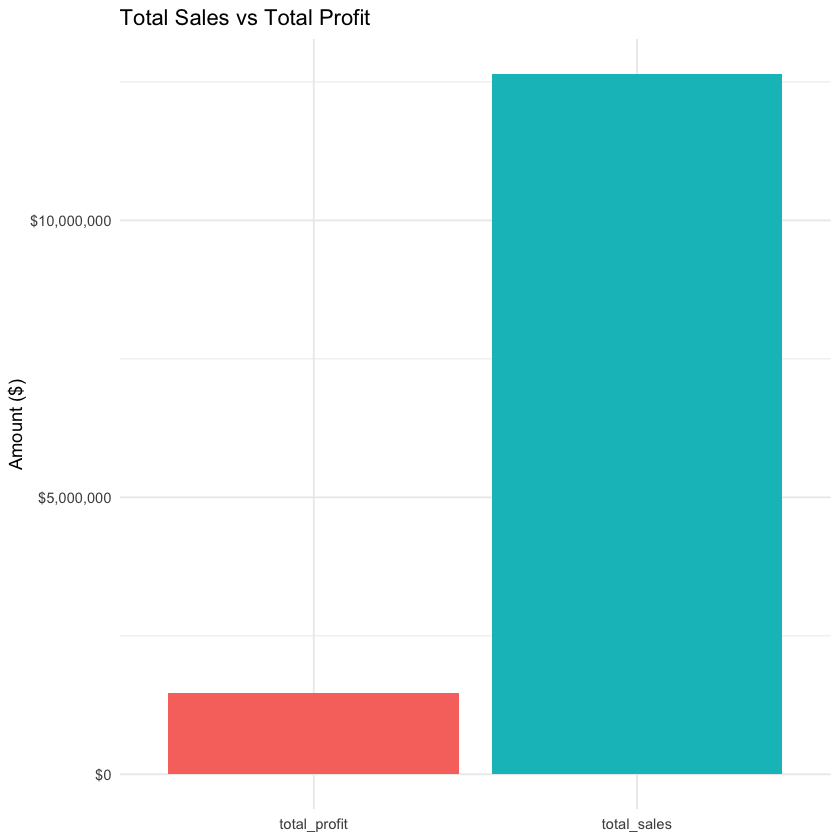

In [2]:
overall_totals <- orders %>%  
    summarise(    
        total_sales = sum(sales),    
        total_profit = sum(profit)  
    ) %>%  
    pivot_longer(everything(), names_to = "metric", values_to = "value")

ggplot(overall_totals, aes(x = metric, y = value, fill = metric)) +  
    geom_col(show.legend = FALSE) +  
    scale_y_continuous(labels = scales::dollar_format()) +  
    labs(    
        title = "Total Sales vs Total Profit",    
        x = NULL,    
        y = "Amount ($)"  
    ) +  
    theme_minimal()

### Sales & Profit by Category/Sub-Category/Product

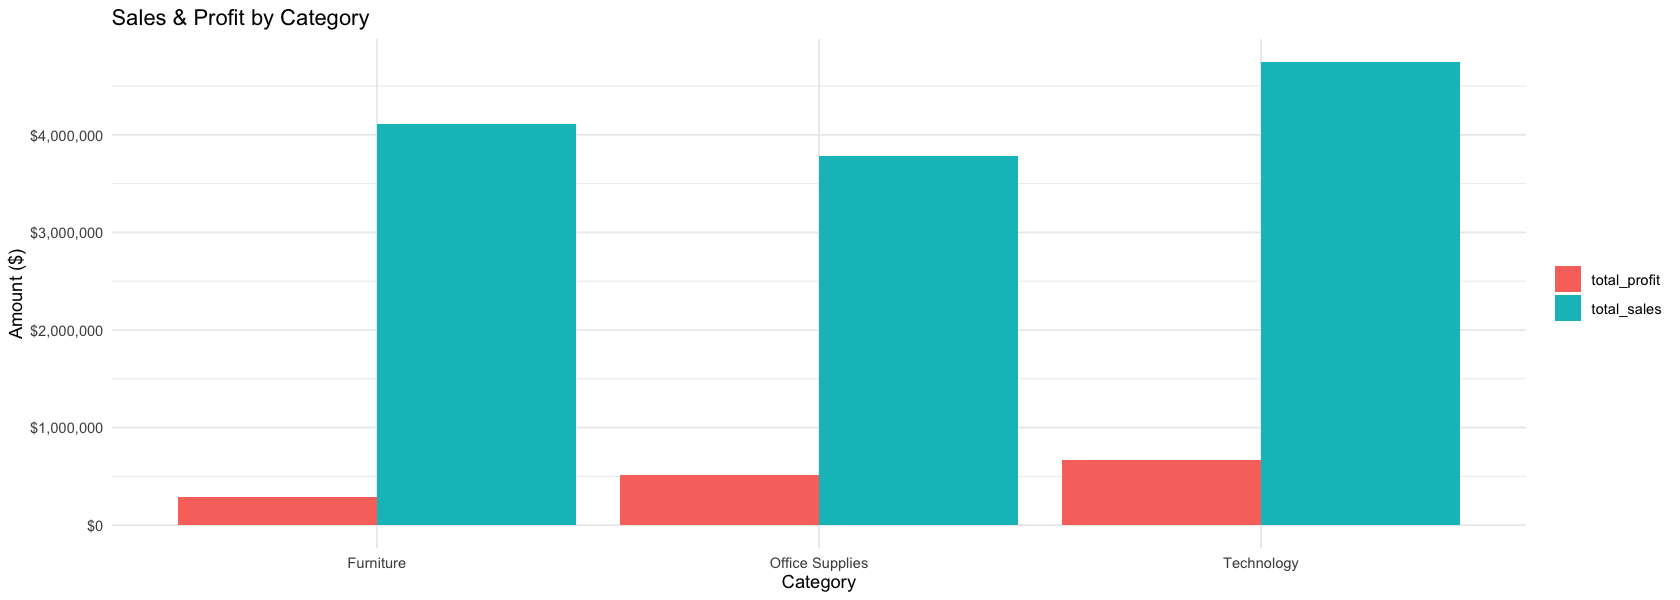

In [5]:
category_perf <- orders %>%
    group_by(category) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

ggplot(category_perf, aes(x = category, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Category",
        x = "Category",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

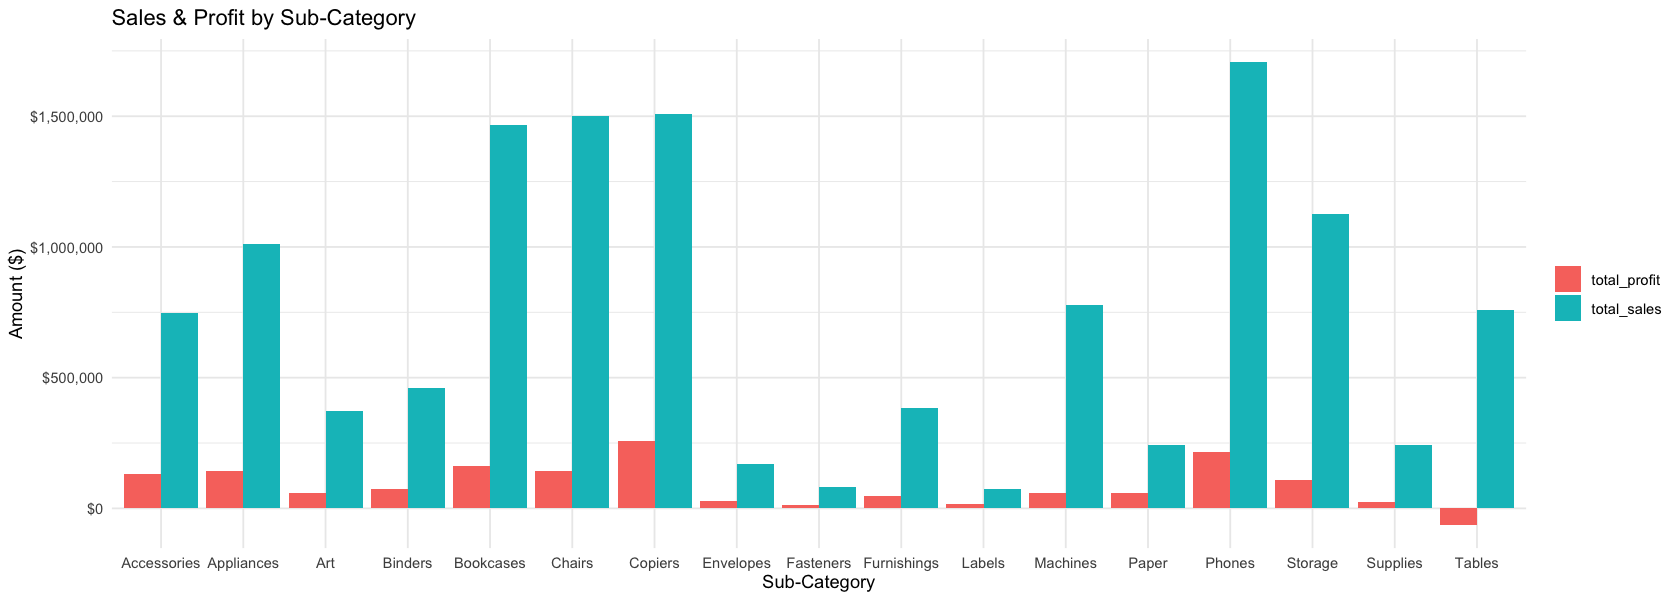

In [ ]:
subcategory_perf <- orders %>%
    group_by(sub_category) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

options(repr.plot.width = 14, repr.plot.height = 5)

ggplot(subcategory_perf, aes(x = sub_category, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Sub-Category",
        x = "Sub-Category",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

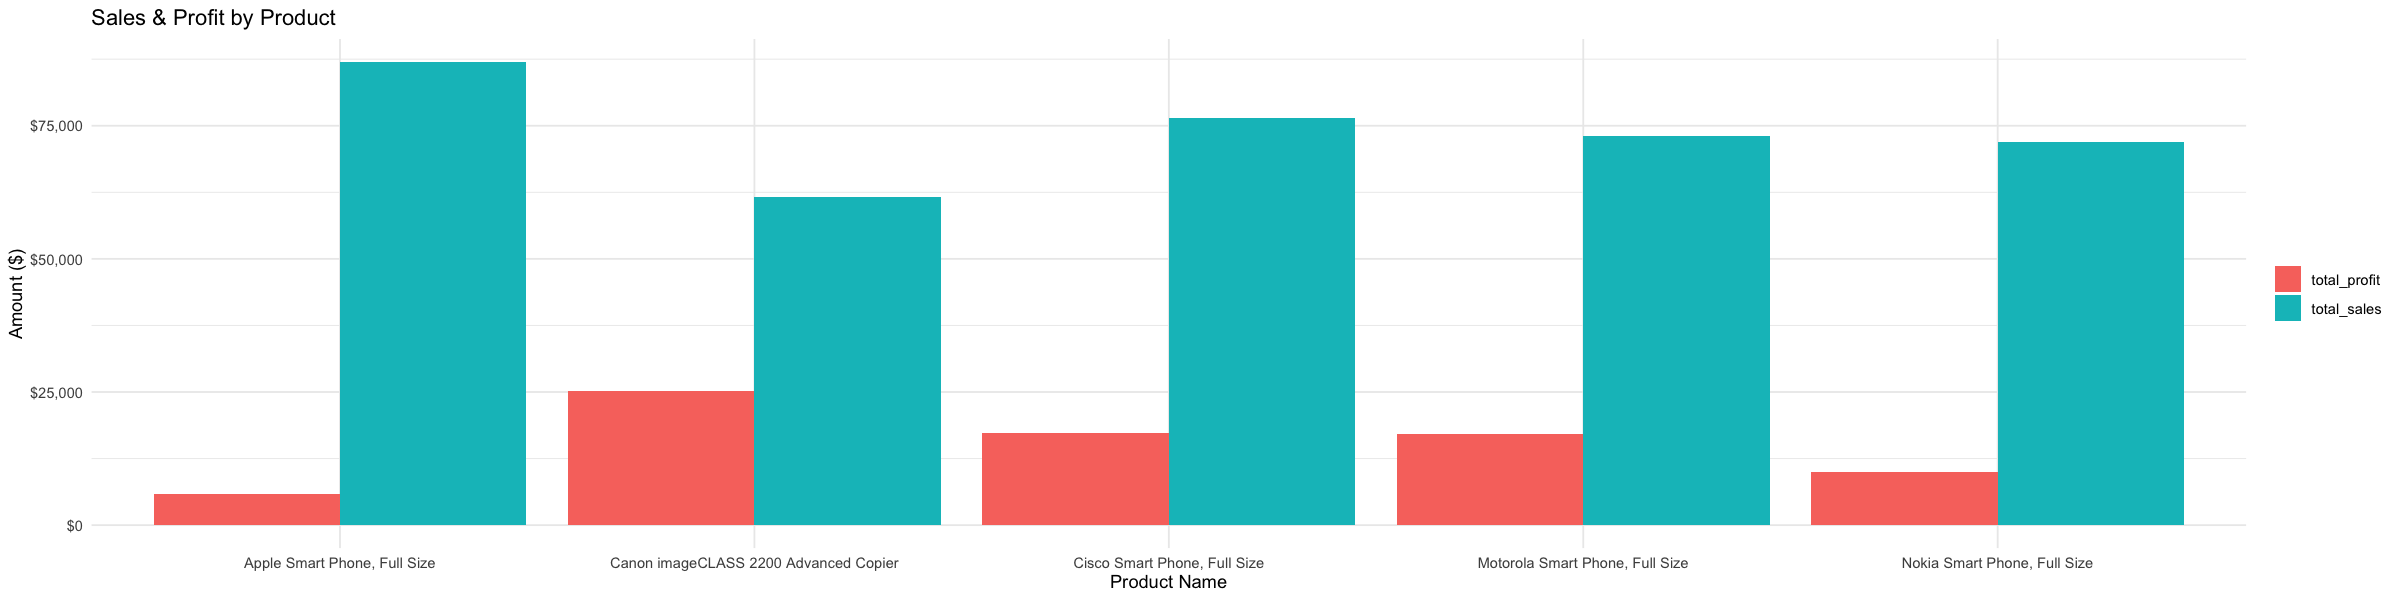

In [6]:
product_perf <- orders %>%
    group_by(product_name) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    slice_max(total_sales, n = 5) %>%
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

options(repr.plot.width = 20, repr.plot.height = 5)

ggplot(product_perf, aes(x = product_name, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Product",
        x = "Product Name",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

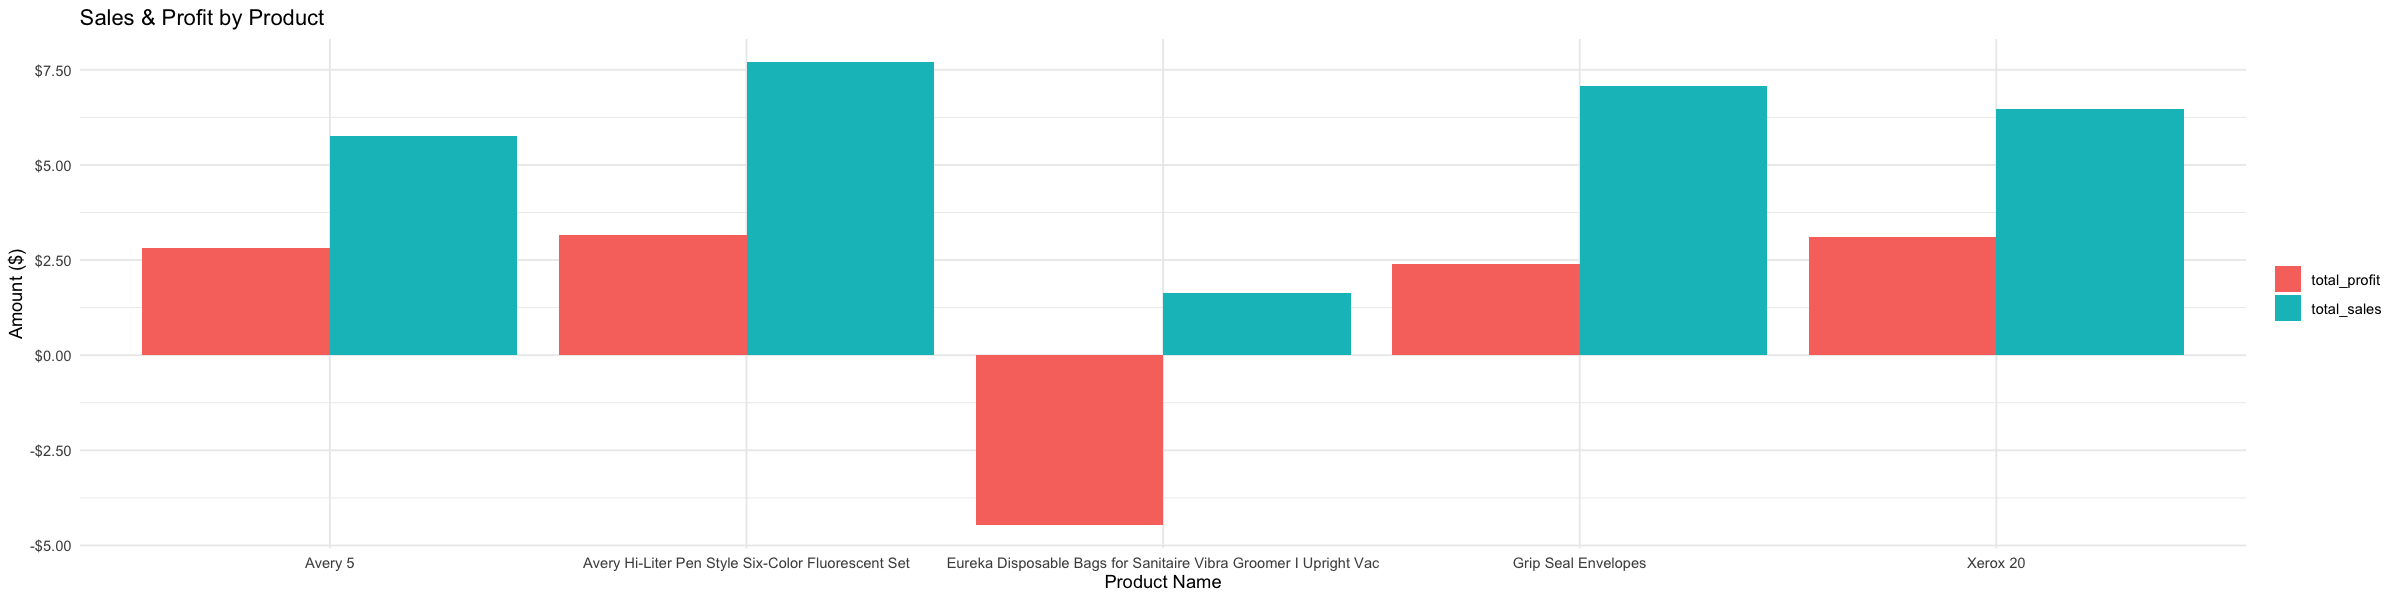

In [7]:
product_perf <- orders %>%
    group_by(product_name) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    arrange(desc(total_sales)) %>%
    slice_min(total_sales, n = 5) %>%
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

options(repr.plot.width = 20, repr.plot.height = 5)

ggplot(product_perf, aes(x = product_name, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Product",
        x = "Product Name",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

### Profit Margin by Category/Sub-Category/Product

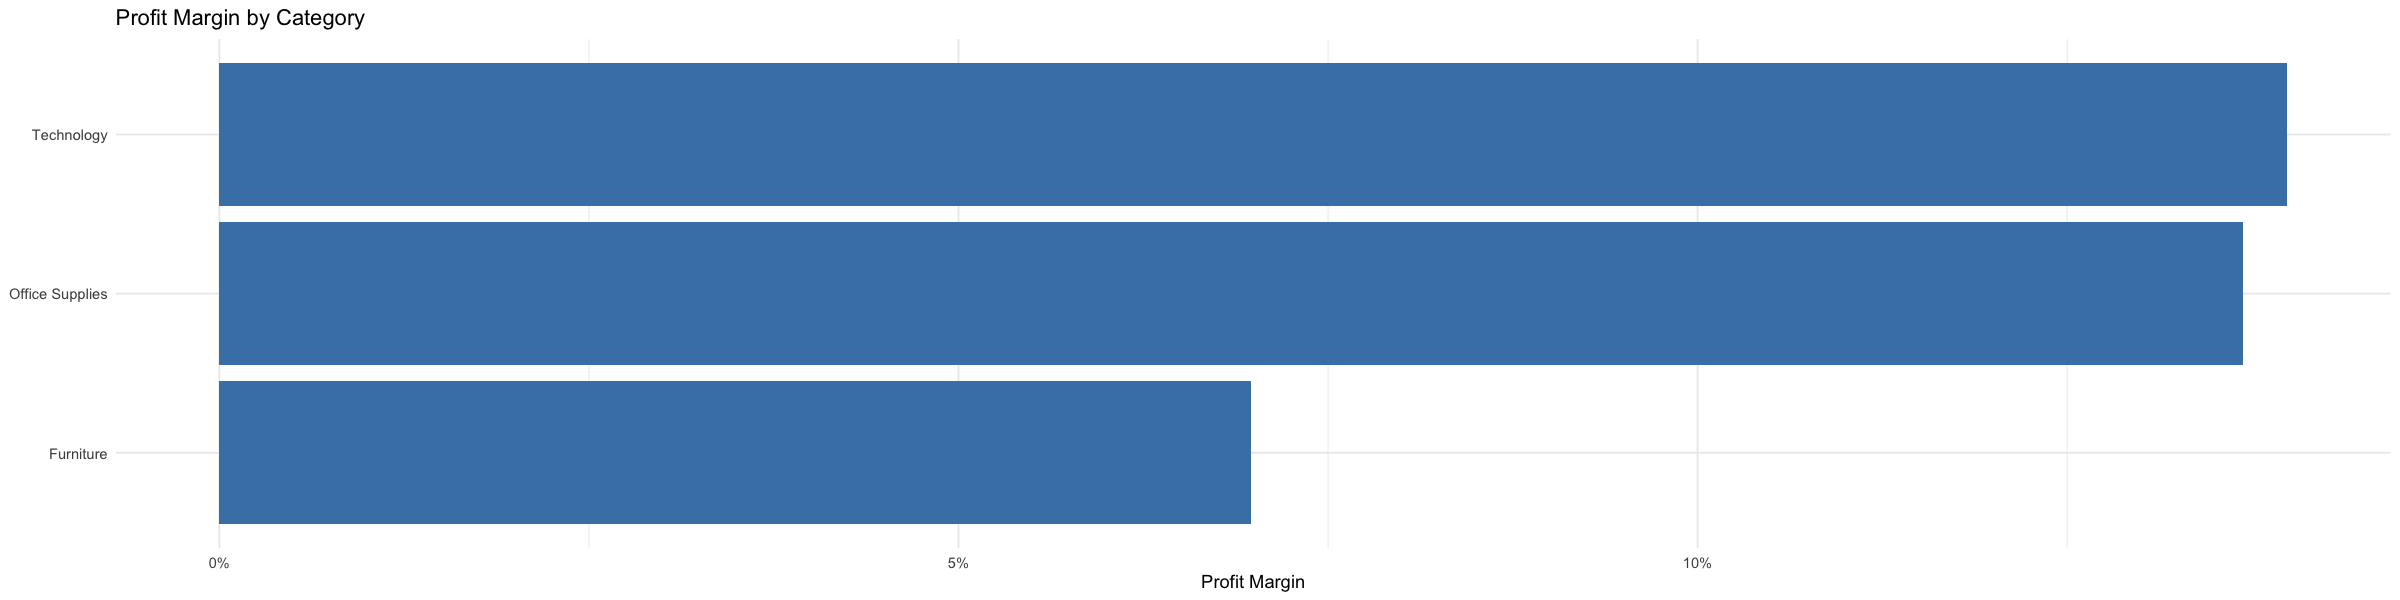

In [8]:
category_margin <- orders %>%
    group_by(category) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    ) %>%
    slice_max(total_sales, n = 5)

ggplot(category_margin, aes(x = reorder(category, profit_margin), y = profit_margin)) +
    geom_col(fill = "steelblue") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    coord_flip() +
    labs(
        title = "Profit Margin by Category",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

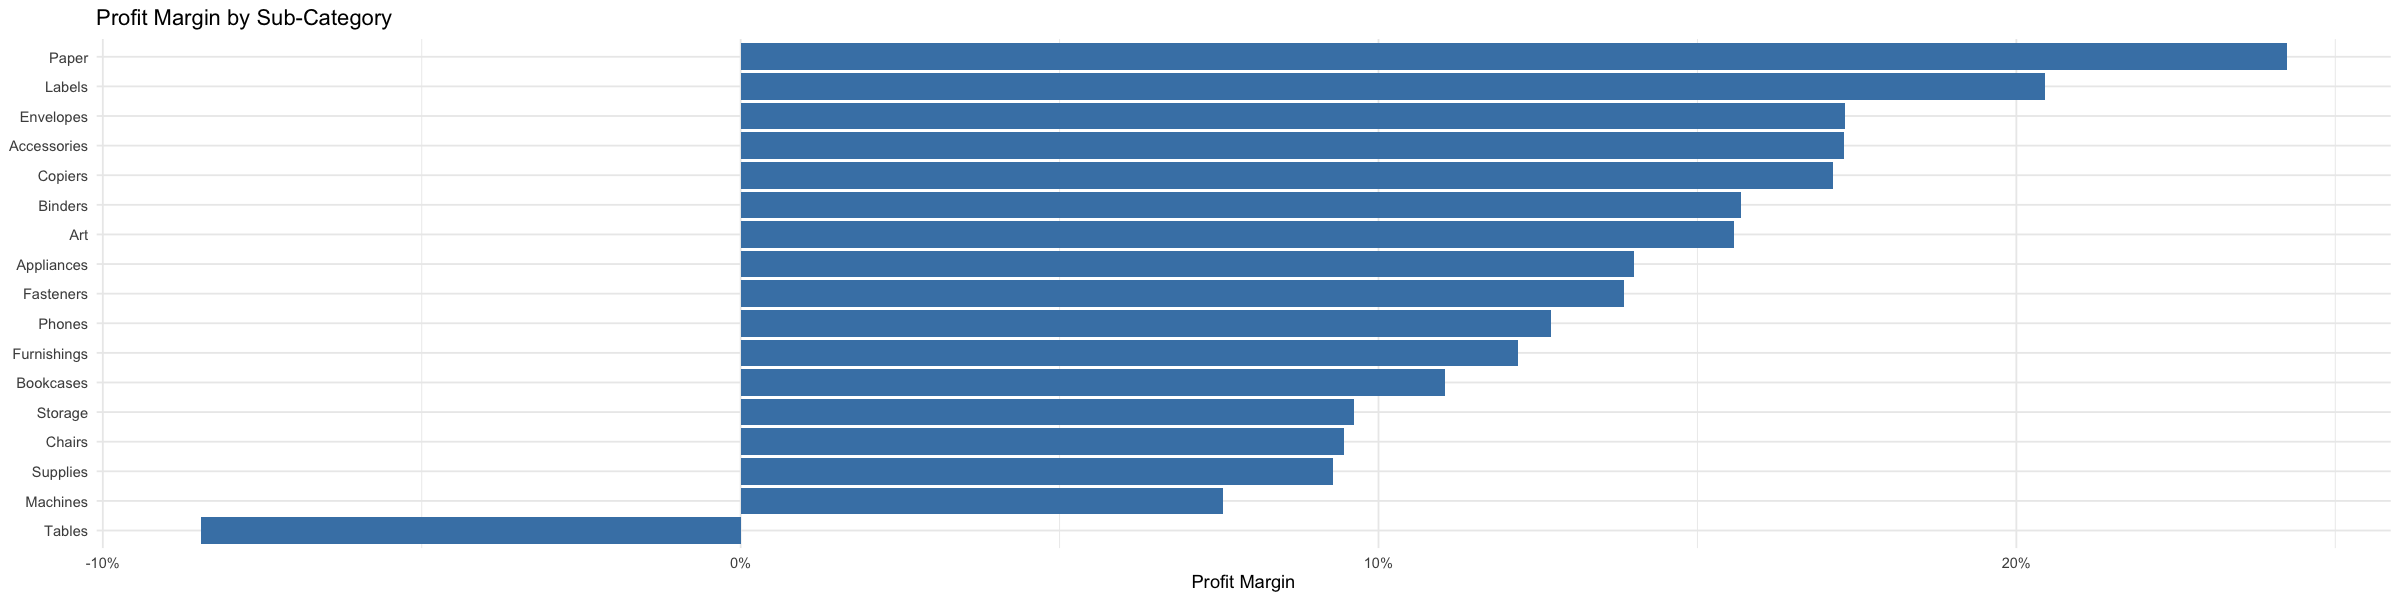

In [9]:
subcategory_margin <- orders %>%
    group_by(sub_category) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    )

ggplot(subcategory_margin, aes(x = reorder(sub_category, profit_margin), y = profit_margin)) +
    geom_col(fill = "steelblue") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    coord_flip() +
    labs(
        title = "Profit Margin by Sub-Category",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

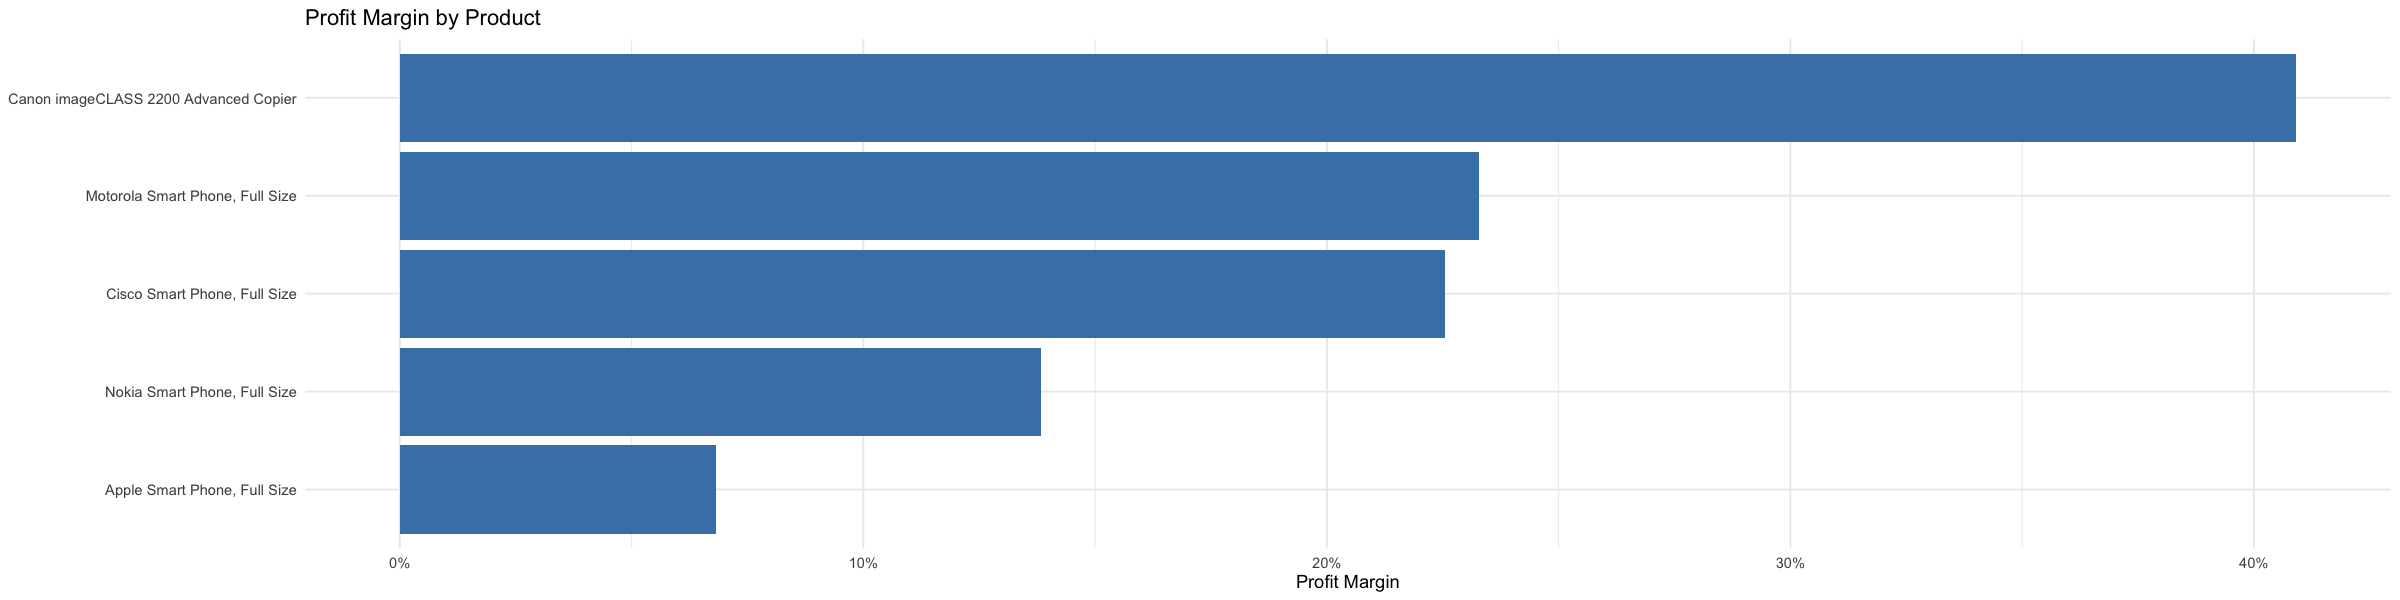

In [10]:
product_margin <- orders %>%
    group_by(product_name) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    ) %>%
    slice_max(total_sales, n = 5)

ggplot(product_margin, aes(x = reorder(product_name, profit_margin), y = profit_margin)) +
    geom_col(fill = "steelblue") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    coord_flip() +
    labs(
        title = "Profit Margin by Product",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

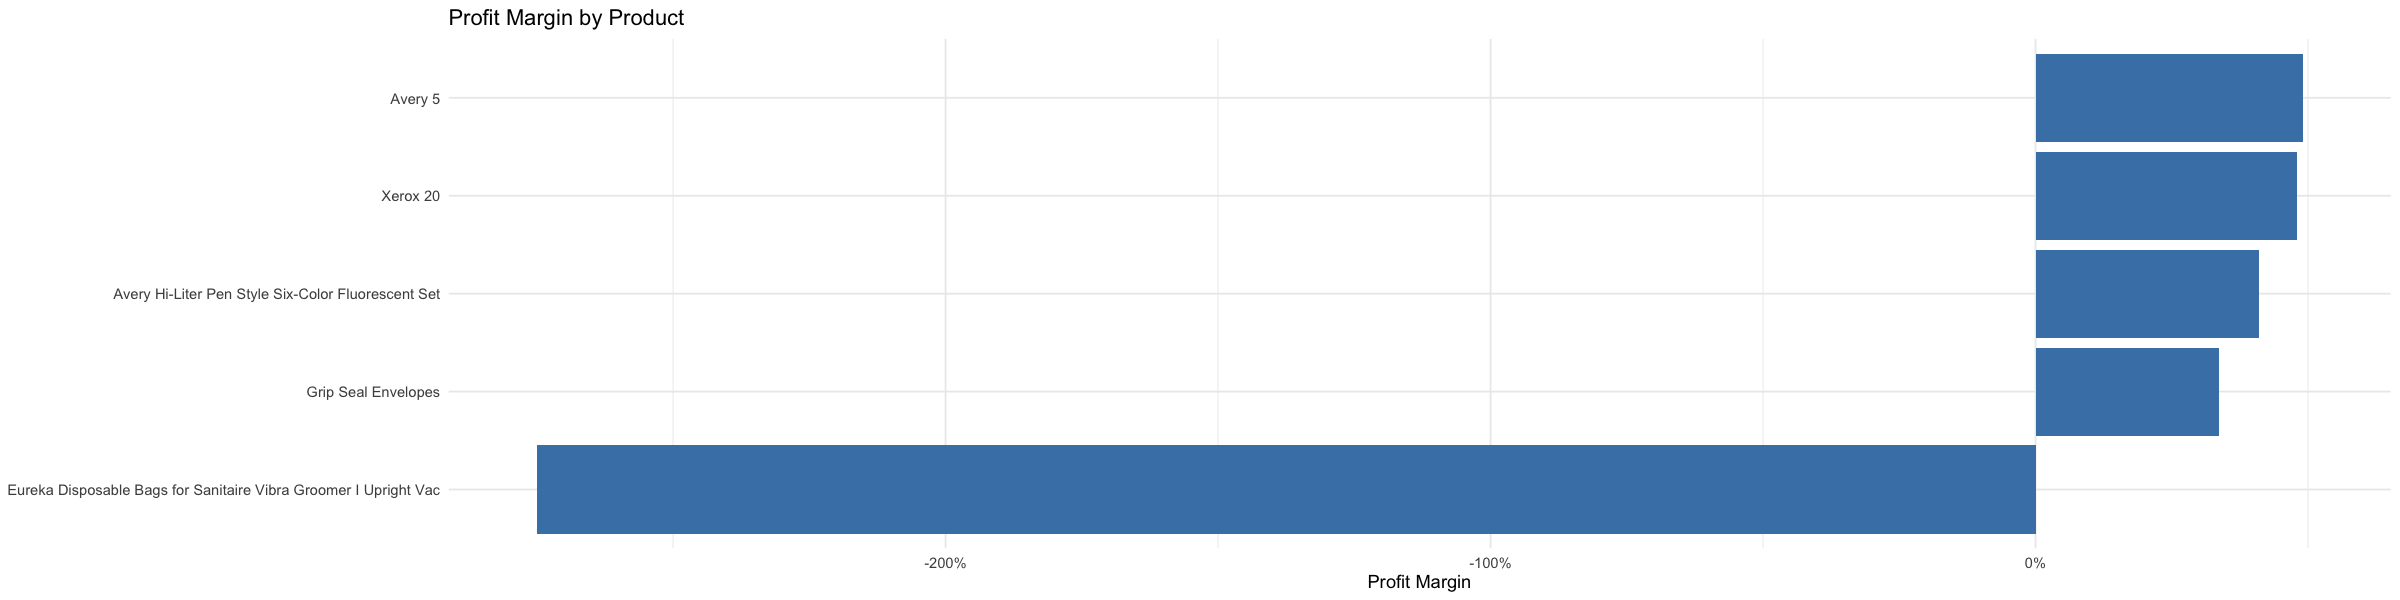

In [11]:
product_margin <- orders %>%
    group_by(product_name) %>%
    summarise(
        total_sales = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    ) %>%
    slice_min(total_sales, n = 5)

ggplot(product_margin, aes(x = reorder(product_name, profit_margin), y = profit_margin)) +
    geom_col(fill = "steelblue") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    coord_flip() +
    labs(
        title = "Profit Margin by Product",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

### Sales vs Profit scatter

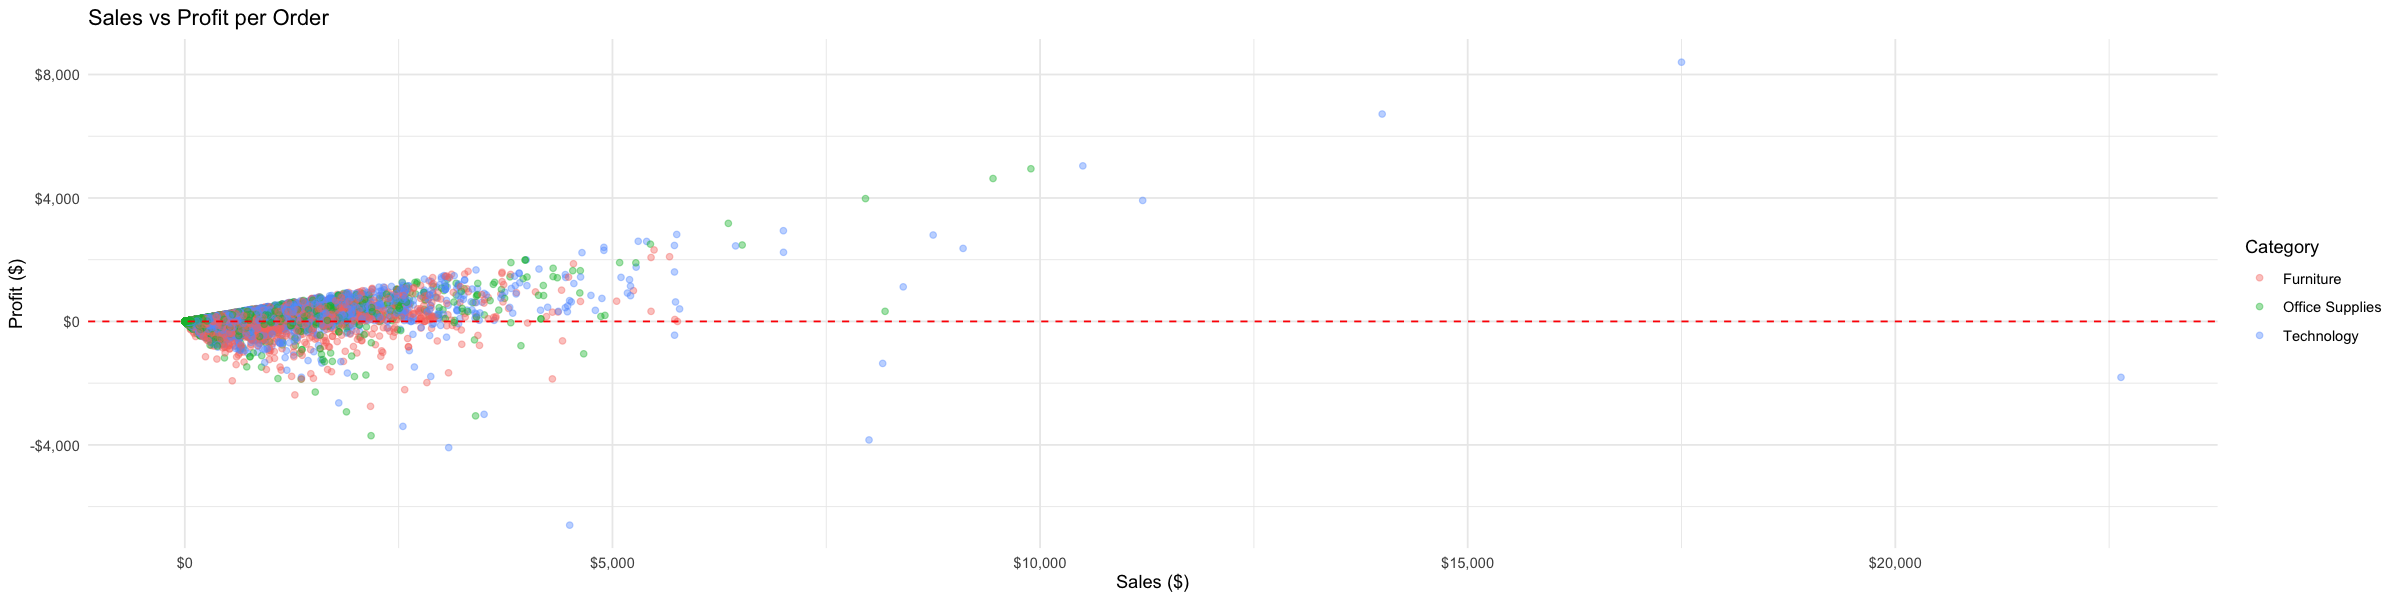

In [12]:
ggplot(orders, aes(x = sales, y = profit, color = category)) +
    geom_point(alpha = 0.4) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    scale_x_continuous(labels = scales::dollar_format()) +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales vs Profit per Order",
        x = "Sales ($)",
        y = "Profit ($)",
        color = "Category"
    ) +
    theme_minimal()

# Product/Sub-Category/Category-Level Performance

### Category share of total sales

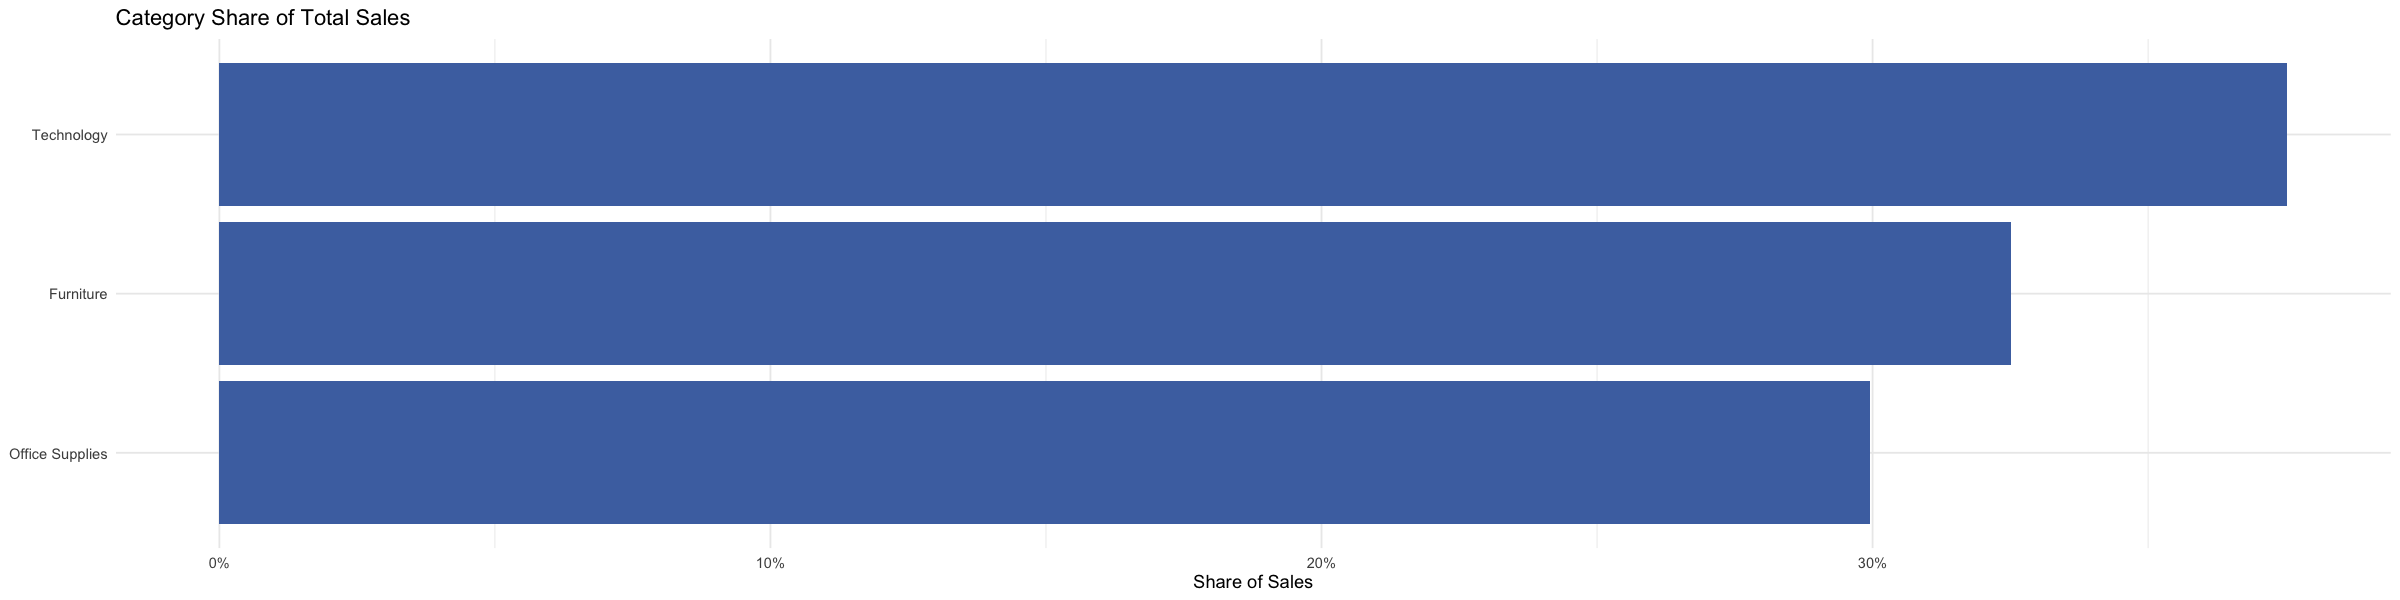

In [13]:
category_sales_share <- orders %>%
    group_by(category) %>%
    summarise(
        total_sales = sum(sales),
        .groups = "drop"
    ) %>%
    mutate(share = total_sales / sum(total_sales))

ggplot(
    category_sales_share,
    aes(x = reorder(category, share), y = share)
) +
    geom_col(fill = "#4c72b0") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Category Share of Total Sales",
        x = NULL,
        y = "Share of Sales"
    ) +
    theme_minimal()

### Category share of total profit

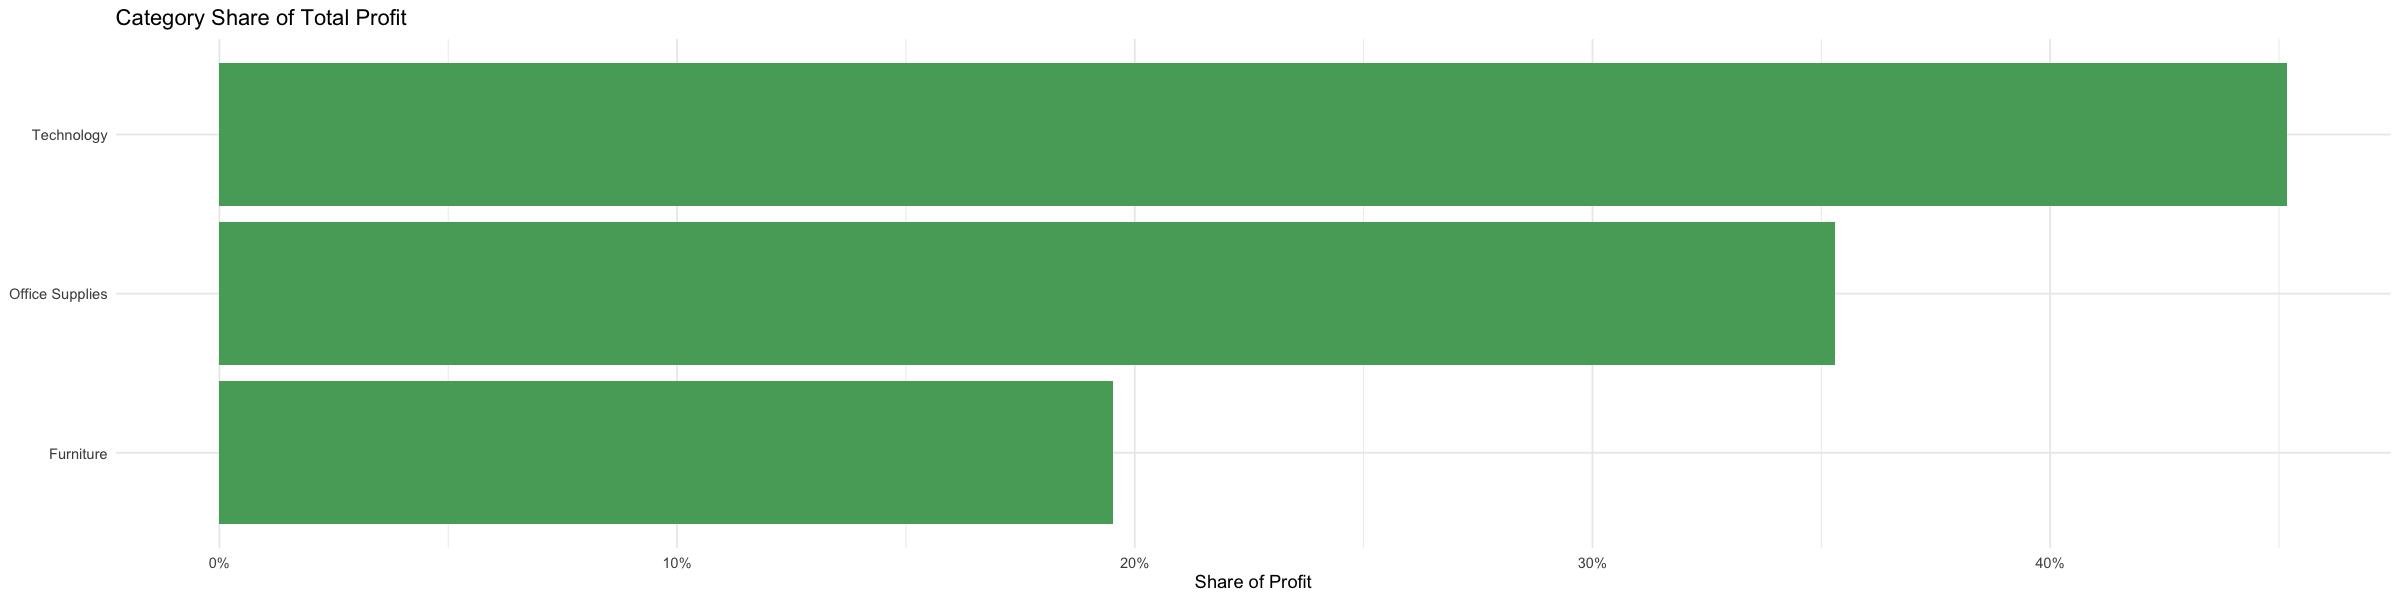

In [15]:
category_profit_share <- orders %>% 
    group_by(category) %>% 
    summarise(
        total_profit = sum(profit),
        .groups = "drop"
    ) %>% 
    mutate(share = total_profit / sum(total_profit))

ggplot(
    category_profit_share,
    aes(x = reorder(category, share), y = share)
) +
    geom_col(fill = "#55a868") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Category Share of Total Profit",
        x = NULL,
        y = "Share of Profit"
    ) +
    theme_minimal()

### Profit margin by category

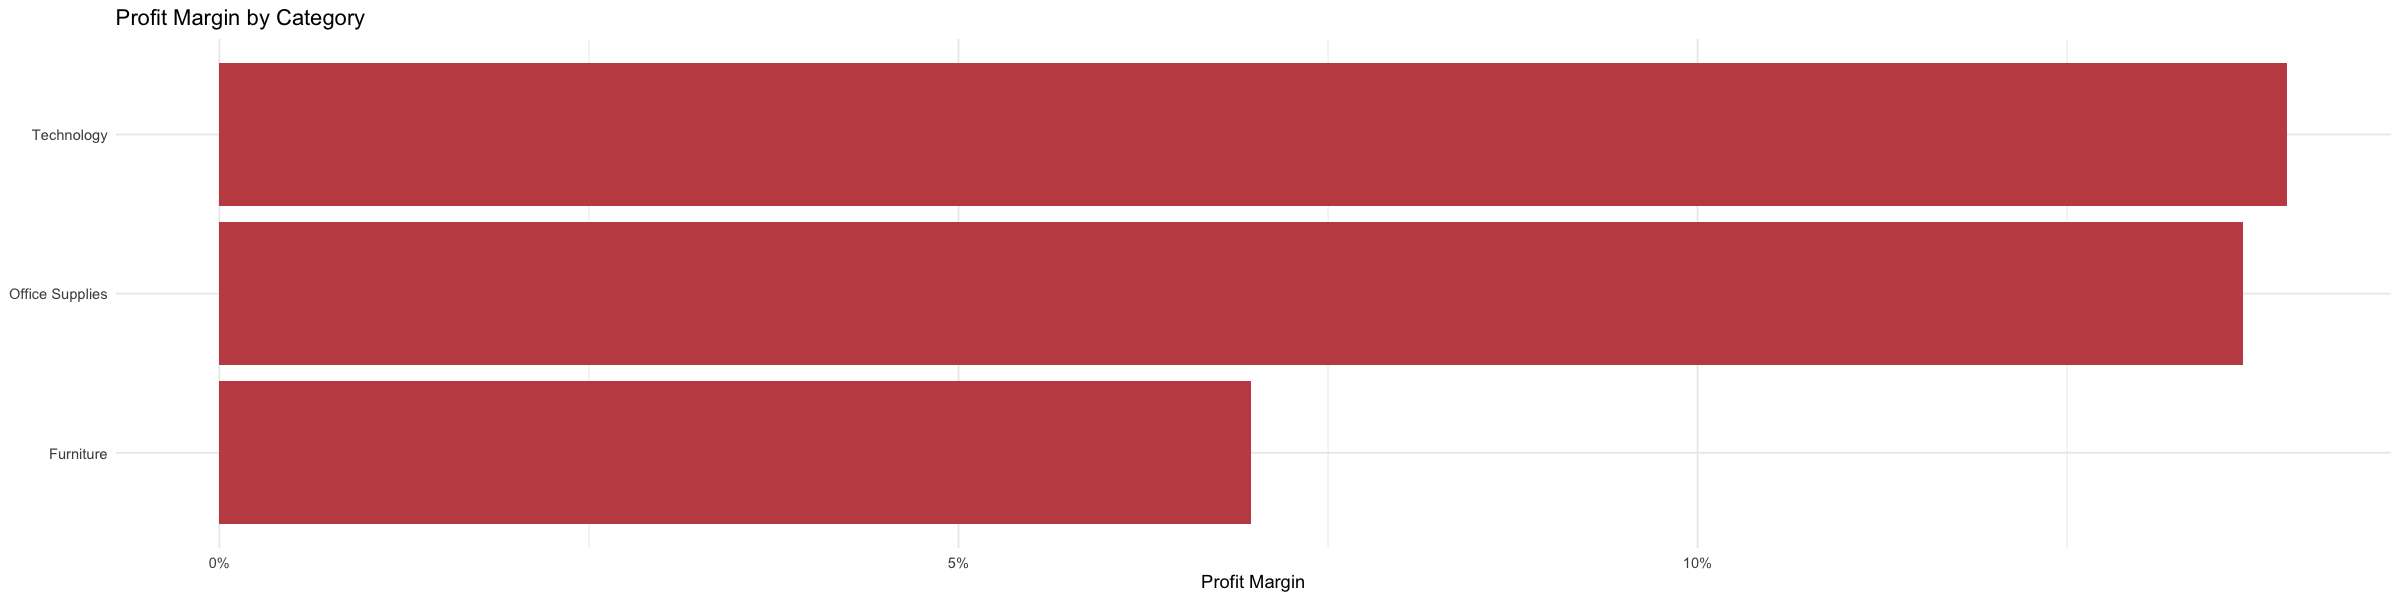

In [16]:
category_margin <- orders %>% 
    group_by(category) %>% 
    summarise(
        sales = sum(sales),
        profit = sum(profit),
        margin = profit / sales,
        .groups = "drop"
    )

ggplot(
    category_margin,
    aes(x = reorder(category, margin), y = margin)
) +
    geom_col(fill = "#c44e52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Profit Margin by Category",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

### Sub-Category share of total sales

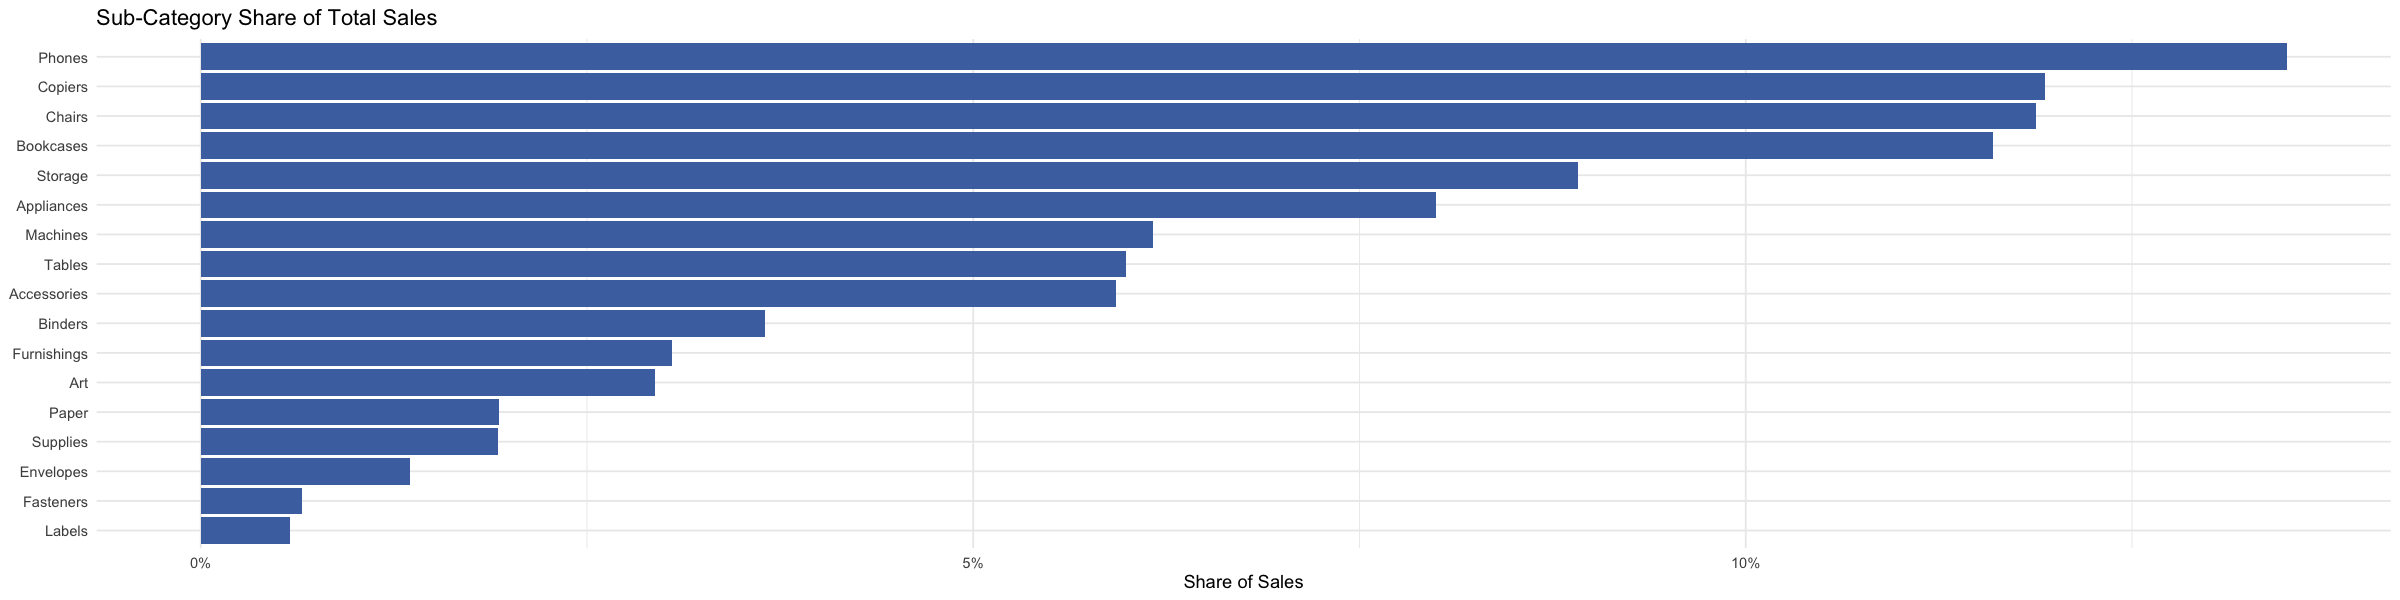

In [17]:
subcategory_sales_share <- orders %>% 
    group_by(sub_category) %>% 
    summarise(
        total_sales = sum(sales),
        .groups = "drop"
    ) %>% 
    mutate(share = total_sales / sum(total_sales))

ggplot(
    subcategory_sales_share,
    aes(x = reorder(sub_category, share), y = share)
) +
    geom_col(fill = "#4c72b0") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Sub-Category Share of Total Sales",
        x = NULL,
        y = "Share of Sales"
    ) +
    theme_minimal()

### Sub-Category share of total profit

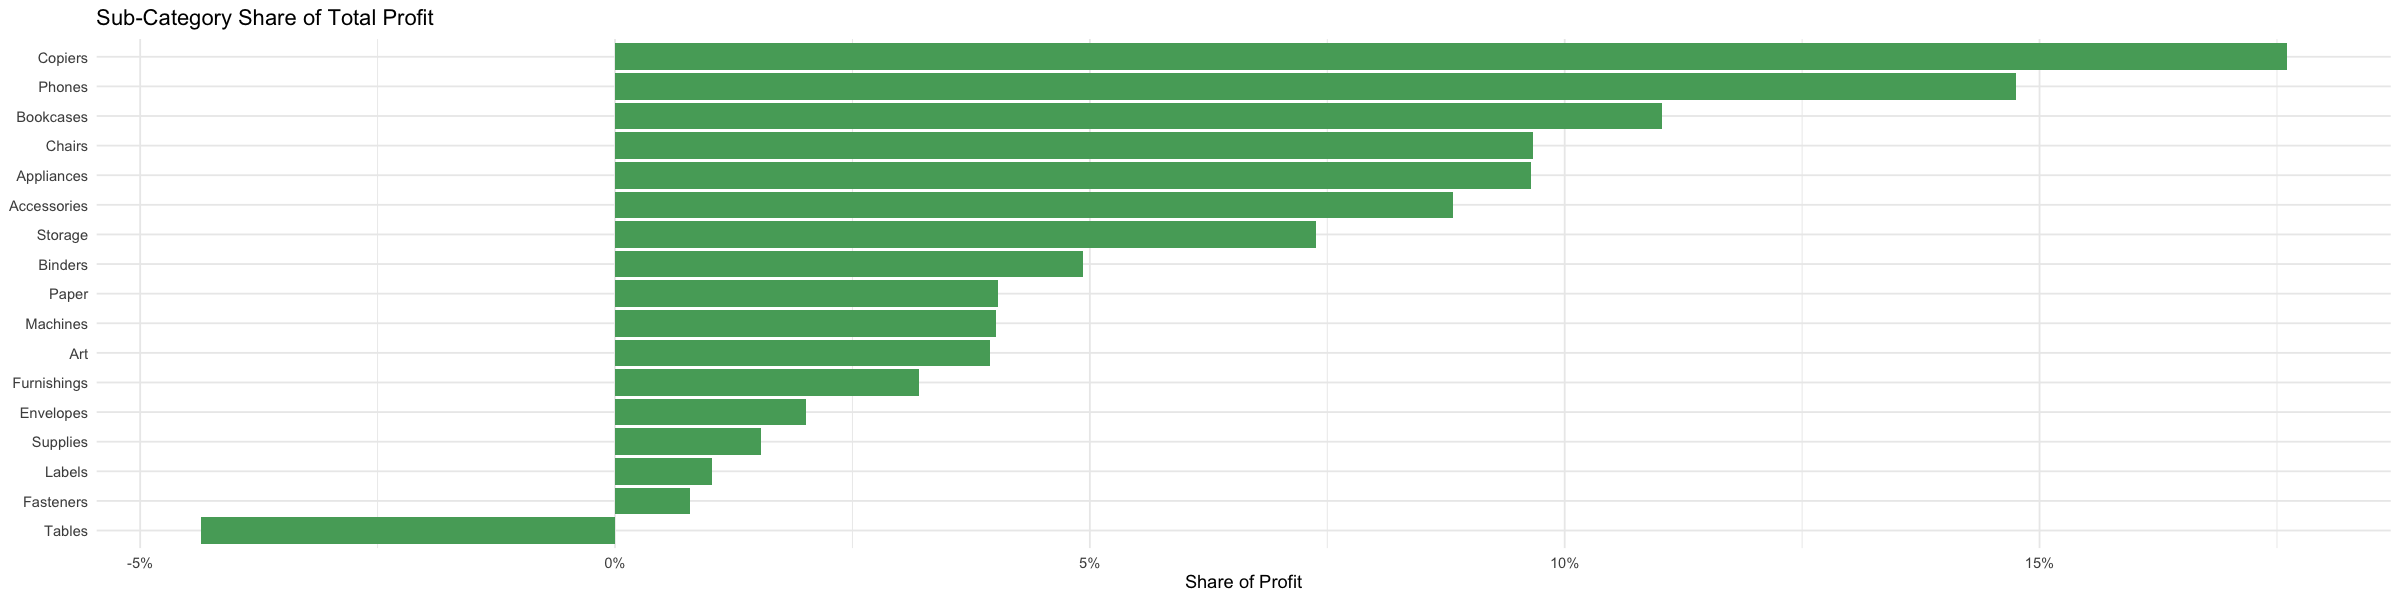

In [18]:
subcategory_profit_share <- orders %>% 
    group_by(sub_category) %>% 
    summarise(
        total_profit = sum(profit),
        .groups = "drop"
    ) %>% 
    mutate(share = total_profit / sum(total_profit))

ggplot(
    subcategory_profit_share,
    aes(x = reorder(sub_category, share), y = share)
) +
    geom_col(fill = "#55a868") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Sub-Category Share of Total Profit",
        x = NULL,
        y = "Share of Profit"
    ) +
    theme_minimal()

### Profit margin by sub-category

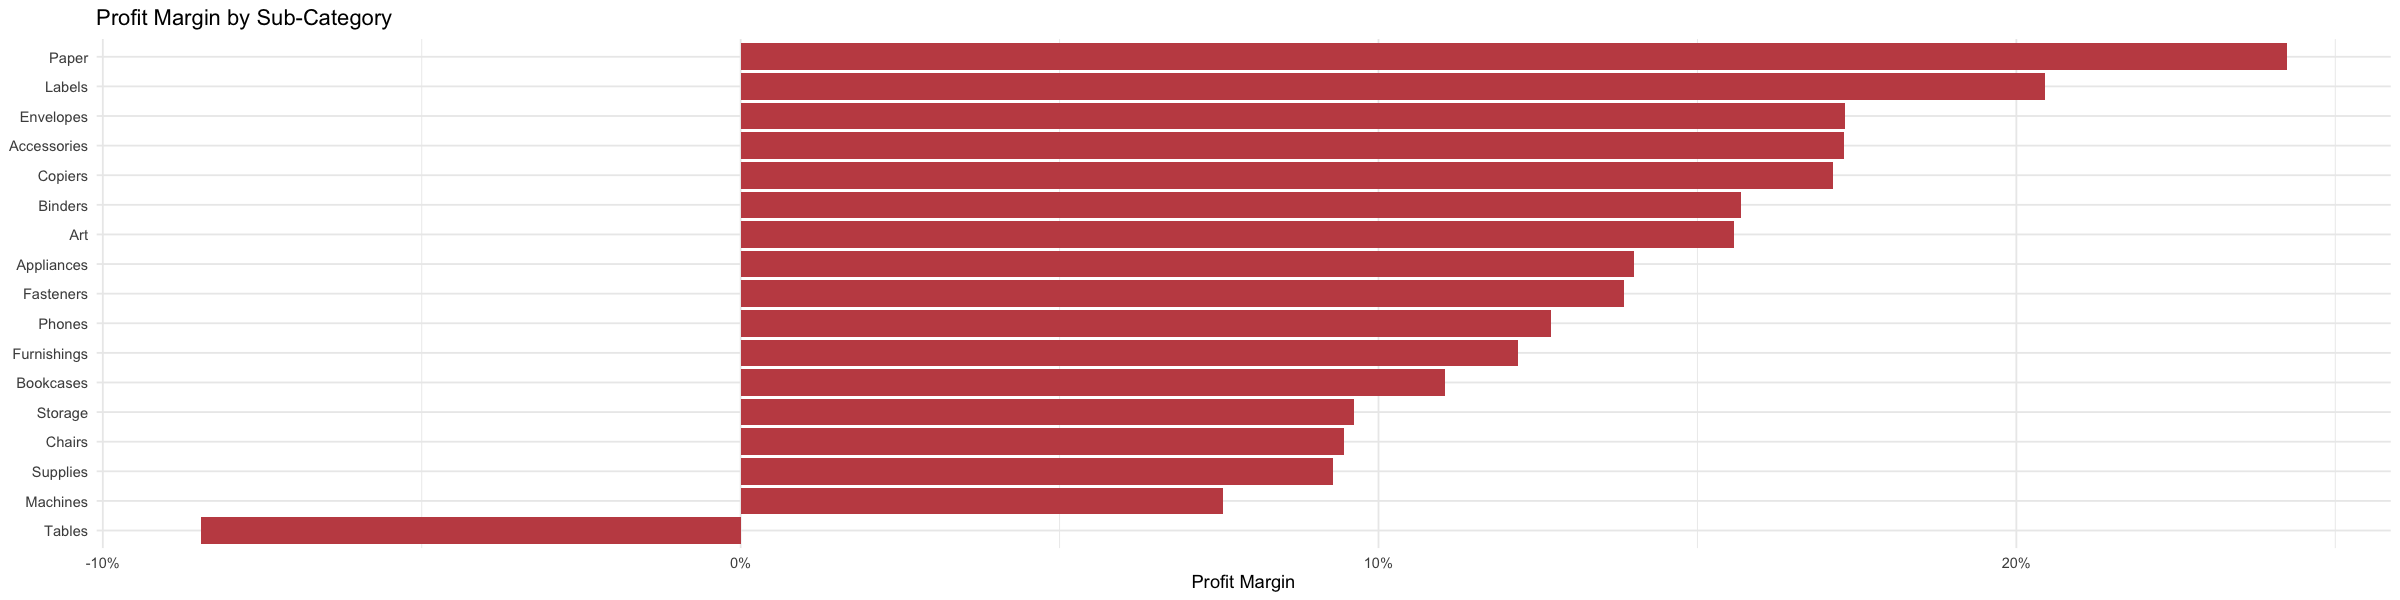

In [19]:
subcategory_margin <- orders %>% 
    group_by(sub_category) %>% 
    summarise(
        sales = sum(sales),
        profit = sum(profit),
        margin = profit / sales,
        .groups = "drop"
    )

ggplot(
    subcategory_margin,
    aes(x = reorder(sub_category, margin), y = margin)
) +
    geom_col(fill = "#c44e52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Profit Margin by Sub-Category",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

### Product share of total sales

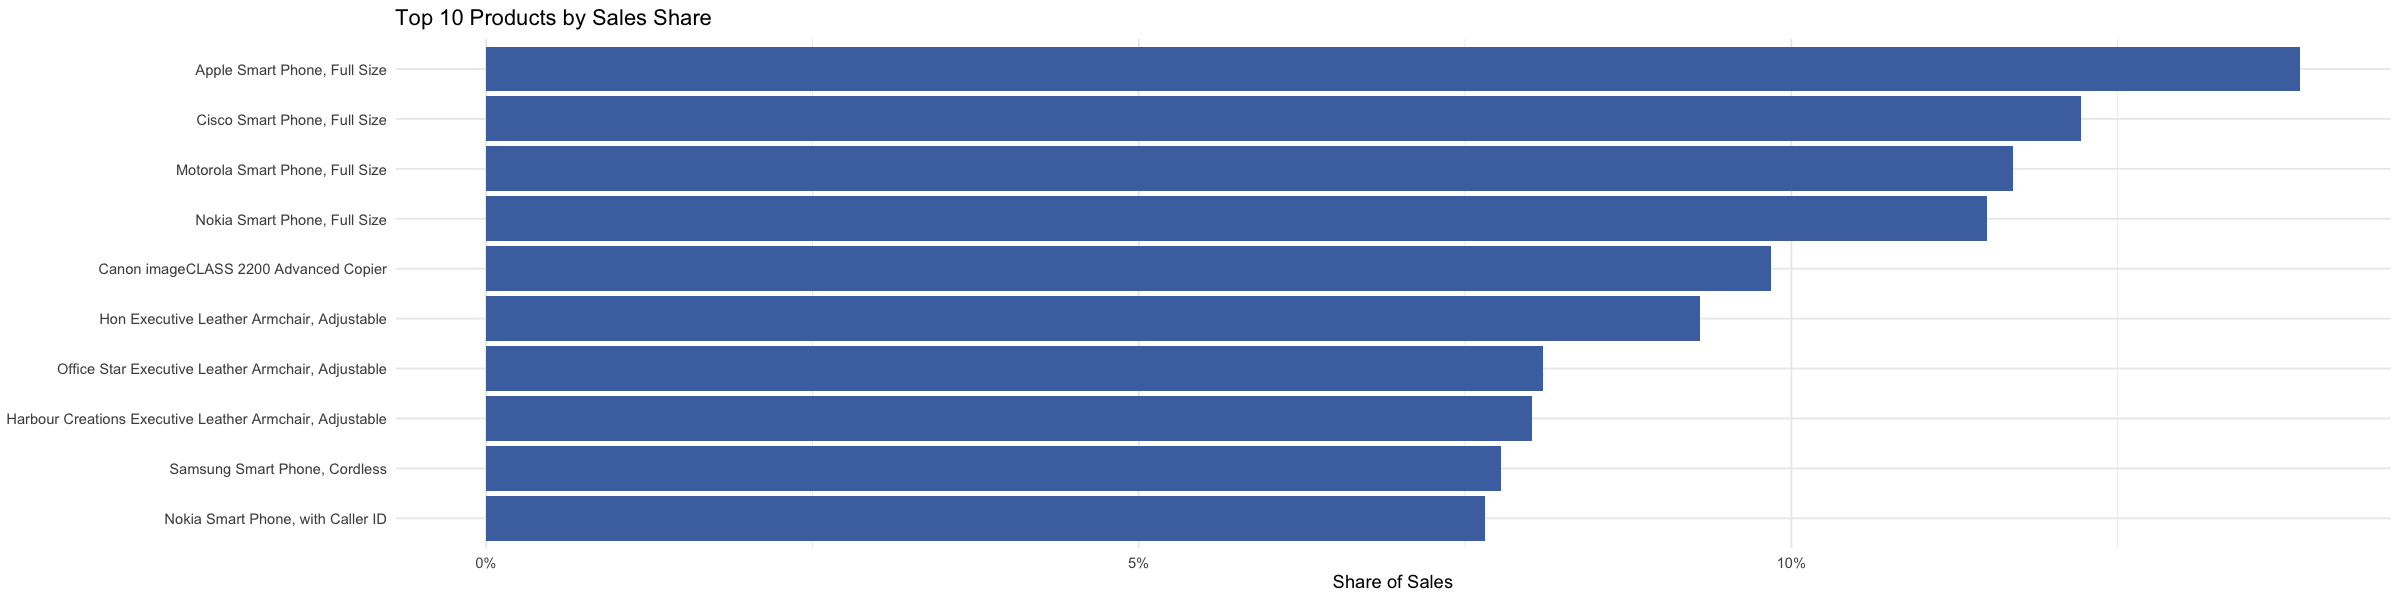

In [20]:
product_sales_share <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        total_sales = sum(sales),
        .groups = "drop"
    ) %>% 
    slice_max(total_sales, n = 10) %>% 
    mutate(share = total_sales / sum(total_sales))

ggplot(
    product_sales_share,
    aes(x = reorder(product_name, share), y = share)
) +
    geom_col(fill = "#4c72b0") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Top 10 Products by Sales Share",
        x = NULL,
        y = "Share of Sales"
    ) +
    theme_minimal()

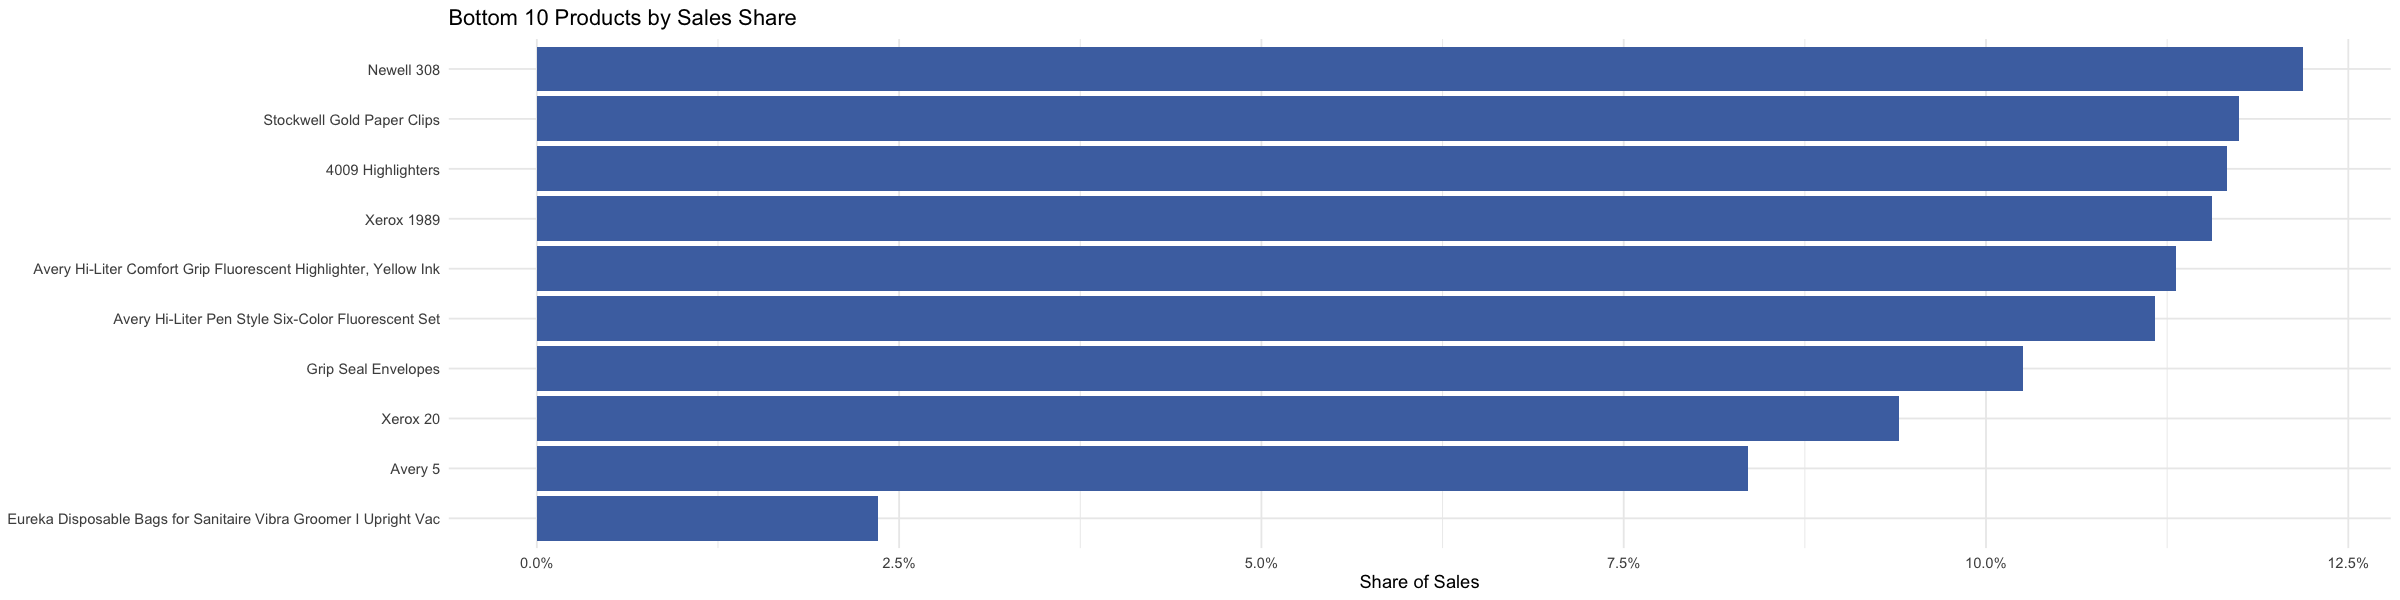

In [21]:
product_sales_share <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        total_sales = sum(sales),
        .groups = "drop"
    ) %>% 
    slice_min(total_sales, n = 10) %>% 
    mutate(share = total_sales / sum(total_sales))

ggplot(
    product_sales_share,
    aes(x = reorder(product_name, share), y = share)
) +
    geom_col(fill = "#4c72b0") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Bottom 10 Products by Sales Share",
        x = NULL,
        y = "Share of Sales"
    ) +
    theme_minimal()

### Product share of total profit

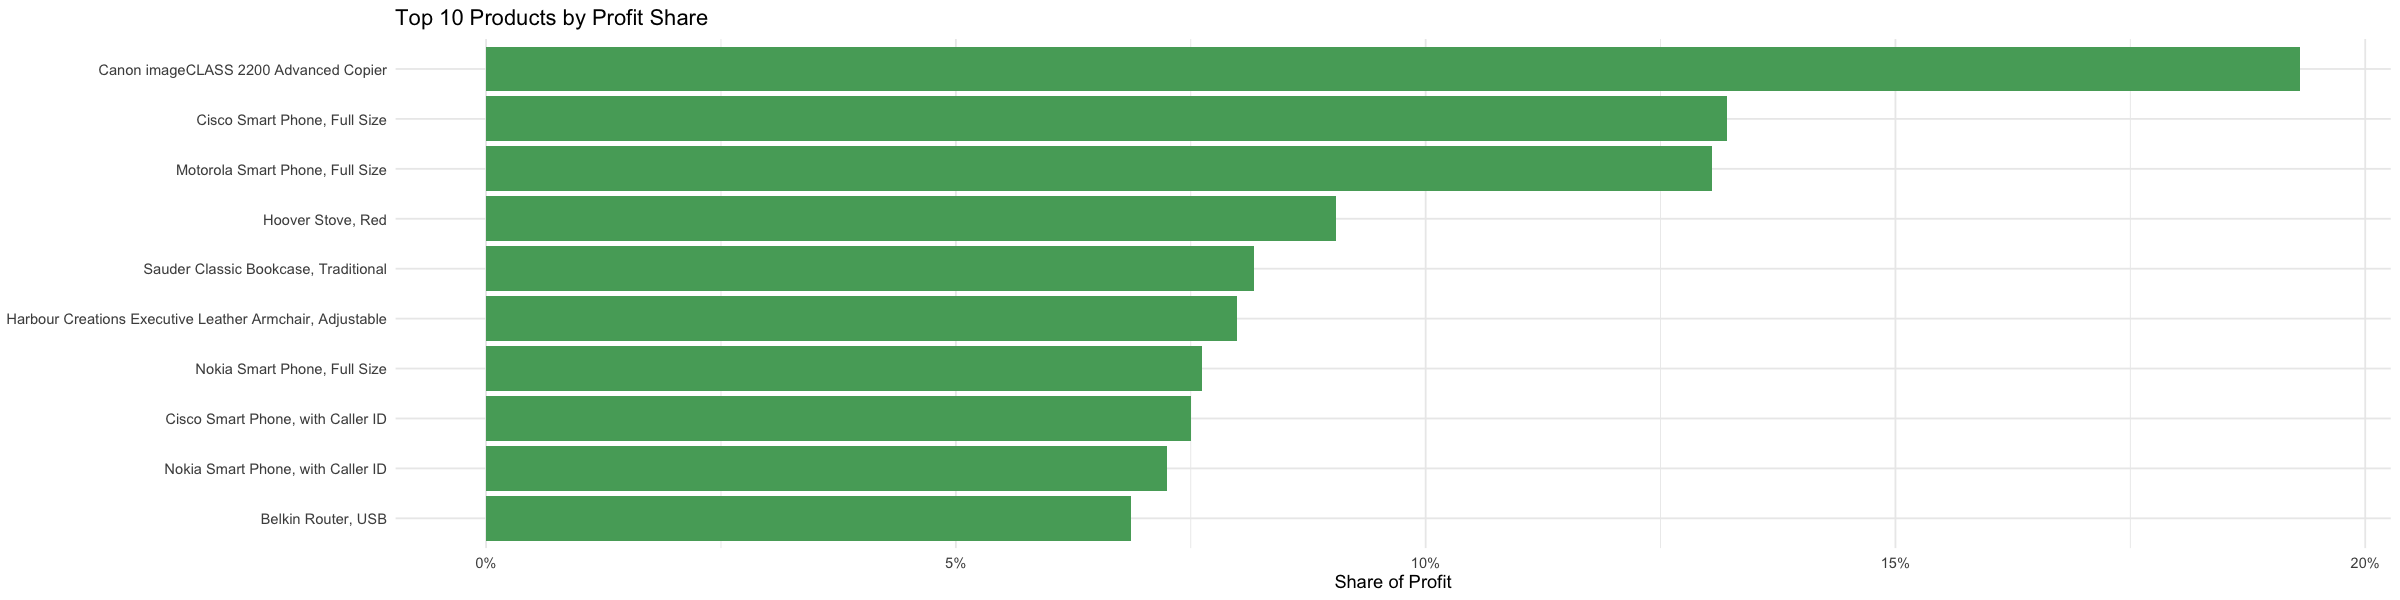

In [22]:
product_profit_share <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        total_profit = sum(profit),
        .groups = "drop"
    ) %>% 
    slice_max(total_profit, n = 10) %>% 
    mutate(share = total_profit / sum(total_profit))

ggplot(
    product_profit_share,
    aes(x = reorder(product_name, share), y = share)
) +
    geom_col(fill = "#55a868") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Top 10 Products by Profit Share",
        x = NULL,
        y = "Share of Profit"
    ) +
    theme_minimal()

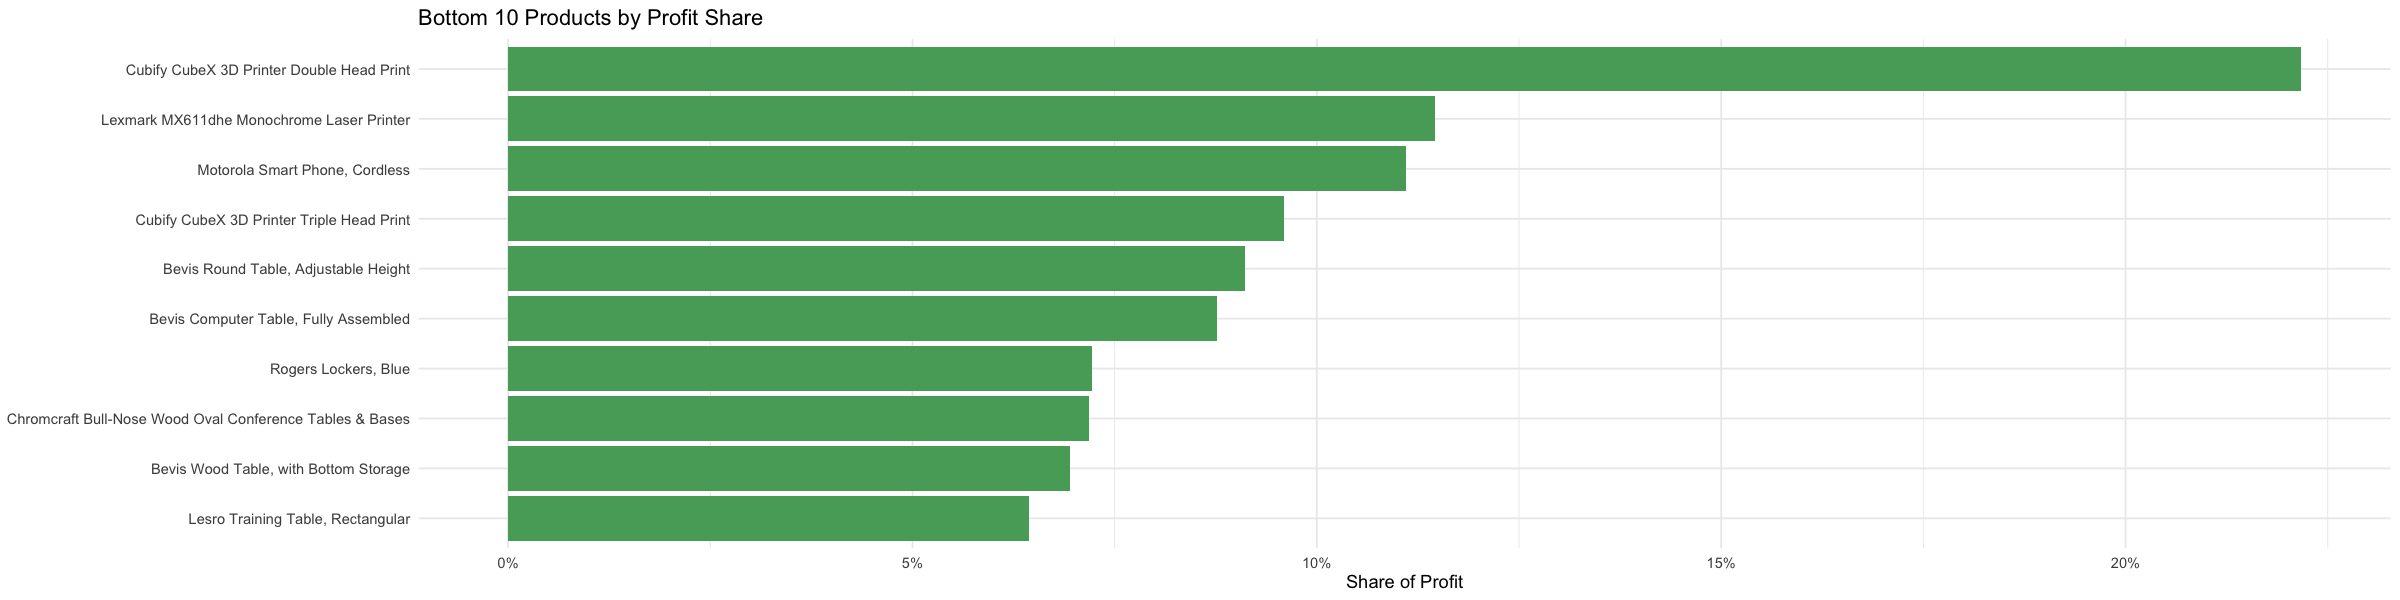

In [23]:
product_profit_share <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        total_profit = sum(profit),
        .groups = "drop"
    ) %>% 
    slice_min(total_profit, n = 10) %>% 
    mutate(share = total_profit / sum(total_profit))

ggplot(
    product_profit_share,
    aes(x = reorder(product_name, share), y = share)
) +
    geom_col(fill = "#55a868") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Bottom 10 Products by Profit Share",
        x = NULL,
        y = "Share of Profit"
    ) +
    theme_minimal()

### Profit margin by product

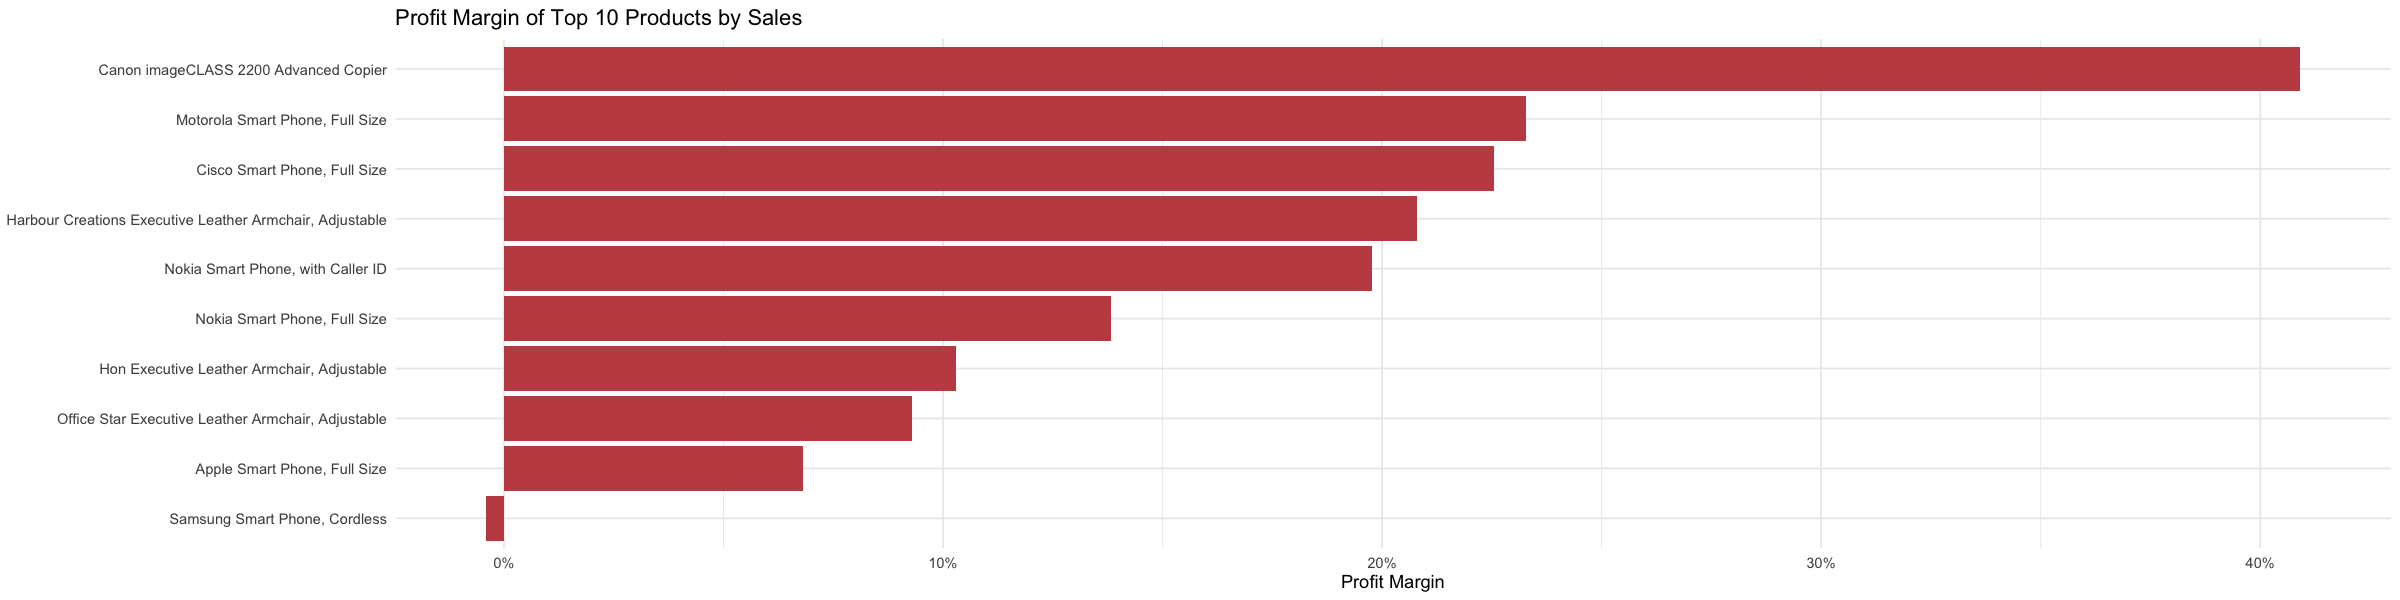

In [25]:
product_margin <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        sales = sum(sales),
        profit = sum(profit),
        margin = profit / sales,
        .groups = "drop"
    ) %>% 
    slice_max(sales, n = 10)

ggplot(
    product_margin,
    aes(x = reorder(product_name, margin), y = margin)
) +
    geom_col(fill = "#c44e52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Profit Margin of Top 10 Products by Sales",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

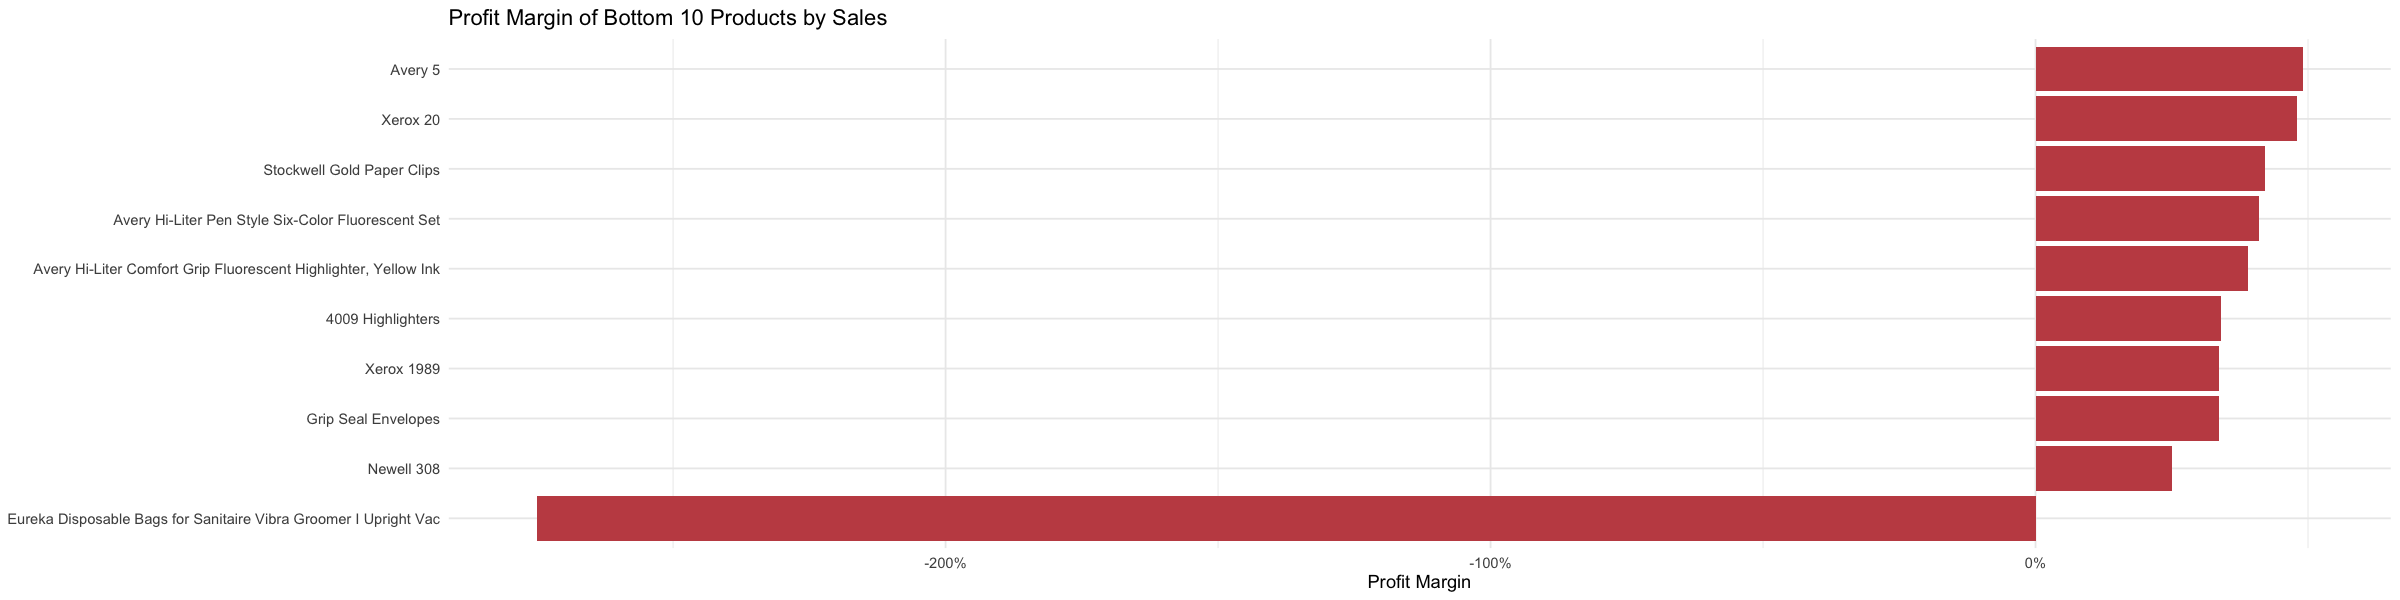

In [26]:
product_margin <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        sales = sum(sales),
        profit = sum(profit),
        margin = profit / sales,
        .groups = "drop"
    ) %>% 
    slice_min(sales, n = 10)

ggplot(
    product_margin,
    aes(x = reorder(product_name, margin), y = margin)
) +
    geom_col(fill = "#c44e52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Profit Margin of Bottom 10 Products by Sales",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

# Discount & Pricing Effects

### Discount vs Profit scatter

`geom_smooth()` using formula = 'y ~ x'


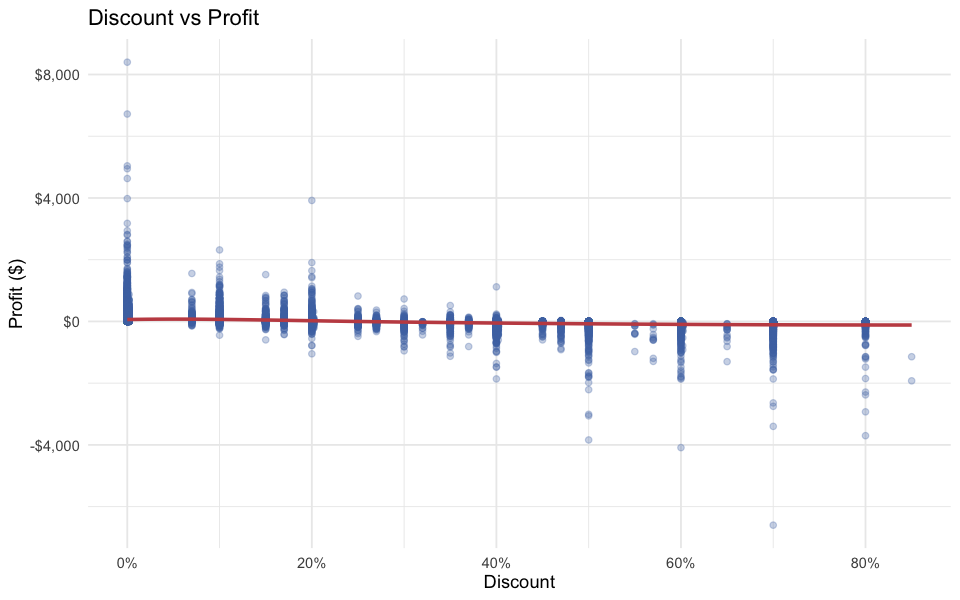

In [27]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(orders, aes(x = discount, y = profit)) +
    geom_point(alpha = 0.3, color = "#4c72b0") +
    geom_smooth(method = "loess", se = FALSE, color = "#c44e52") +
    scale_y_continuous(labels = scales::dollar_format()) +
    scale_x_continuous(labels = scales::percent_format()) +
    labs(
        title = "Discount vs Profit",
        x = "Discount",
        y = "Profit ($)"
    ) +
    theme_minimal()

### Average discount by category

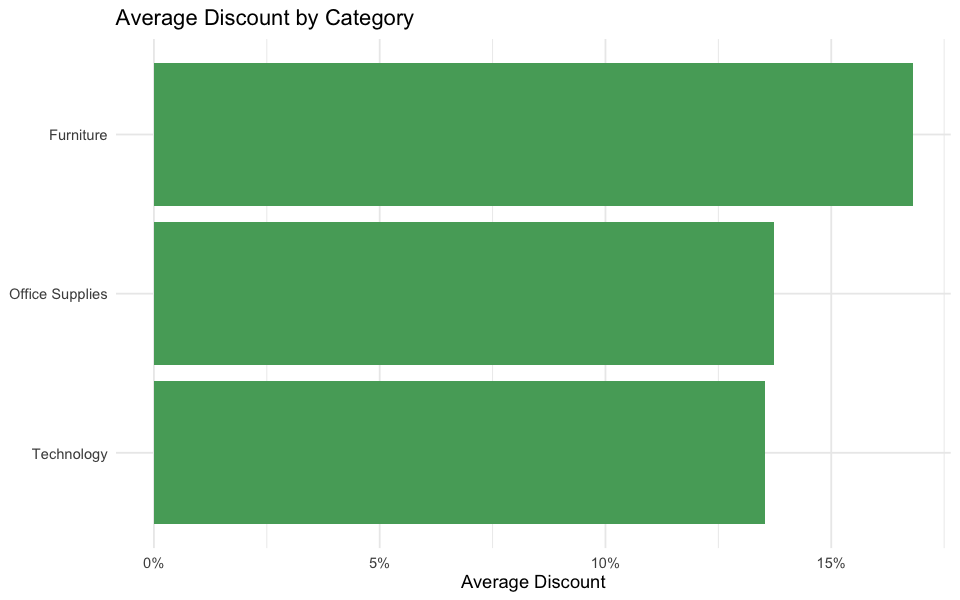

In [28]:
avg_discount_category <- orders %>% 
    group_by(category) %>% 
    summarise(
        avg_discount = mean(discount),
        .groups = "drop"
    )

ggplot(
    avg_discount_category,
    aes(x = reorder(category, avg_discount), y = avg_discount)
) +
    geom_col(fill = "#55a868") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Average Discount by Category",
        x = NULL,
        y = "Average Discount"
    ) +
    theme_minimal()

### Average discount by sub-category

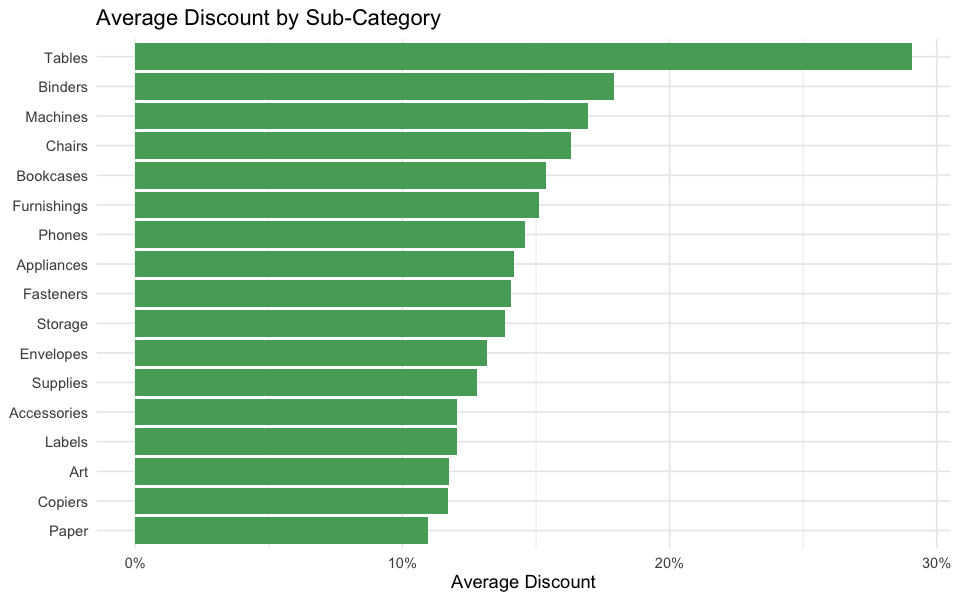

In [29]:
avg_discount_subcategory <- orders %>% 
    group_by(sub_category) %>% 
    summarise(
        avg_discount = mean(discount),
        .groups = "drop"
    )

ggplot(
    avg_discount_subcategory,
    aes(x = reorder(sub_category, avg_discount), y = avg_discount)
) +
    geom_col(fill = "#55a868") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Average Discount by Sub-Category",
        x = NULL,
        y = "Average Discount"
    ) +
    theme_minimal()

### Average discount by product

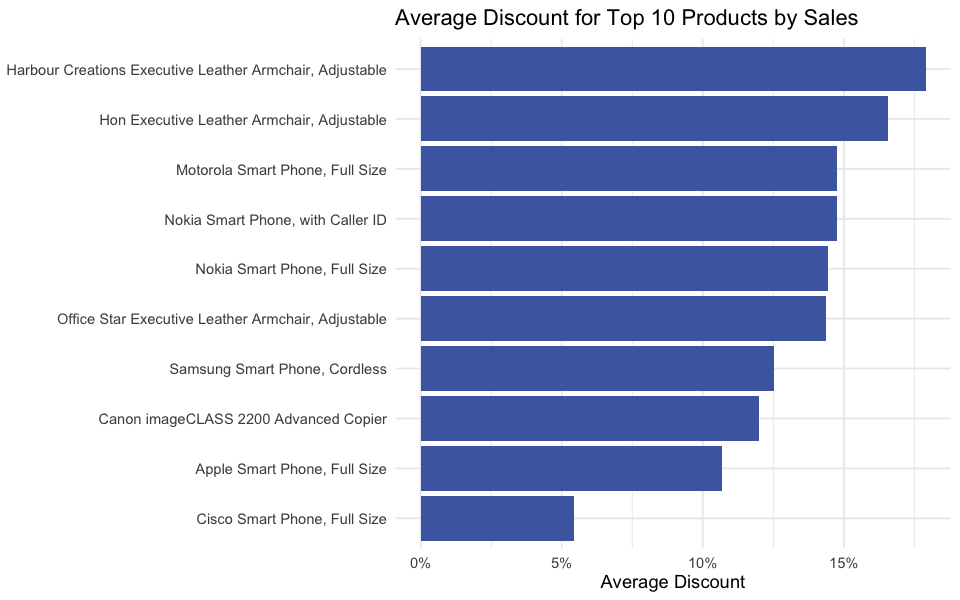

In [30]:
avg_discount_product <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        avg_discount = mean(discount, na.rm = TRUE),
        total_sales = sum(sales),
        .groups = "drop"
    ) %>% 
    slice_max(total_sales, n = 10)

ggplot(
    avg_discount_product,
    aes(x = reorder(product_name, avg_discount), y = avg_discount)
) +
    geom_col(fill = "#4c6ab0ff") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Average Discount for Top 10 Products by Sales",
        x = NULL,
        y = "Average Discount"
    ) +
    theme_minimal()

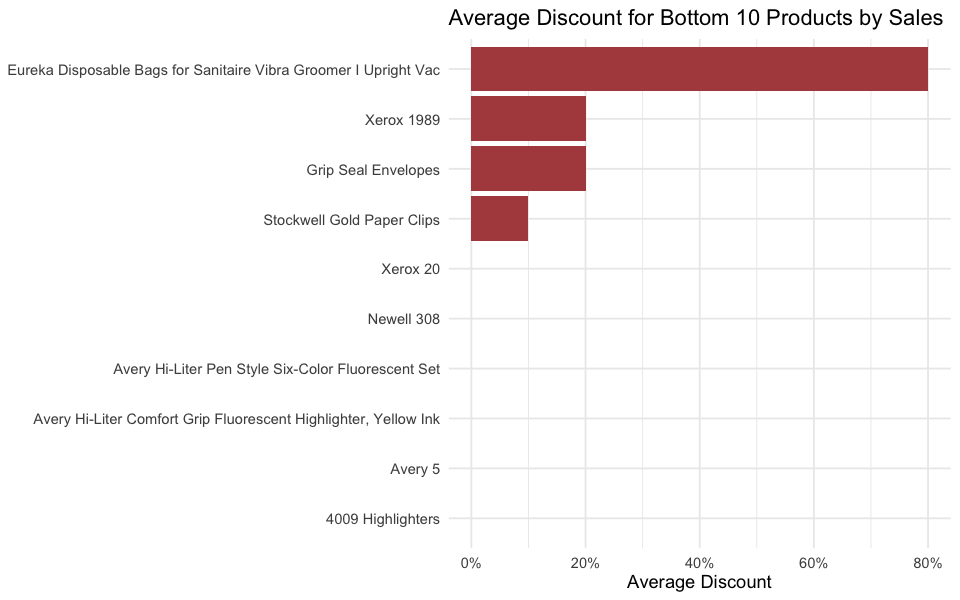

In [ ]:
avg_discount_product <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        avg_discount = mean(discount, na.rm = TRUE),
        total_sales = sum(sales),
        .groups = "drop"
    ) %>% 
    slice_min(total_sales, n = 10)

ggplot(
    avg_discount_product,
    aes(x = reorder(product_name, avg_discount), y = avg_discount)
) +
    geom_col(fill = "#b04c4cff") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Average Discount for Bottom 10 Products by Sales",
        x = NULL,
        y = "Average Discount"
    ) +
    theme_minimal()

# Order Value & Volume Summary

### Distribution of order sales

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


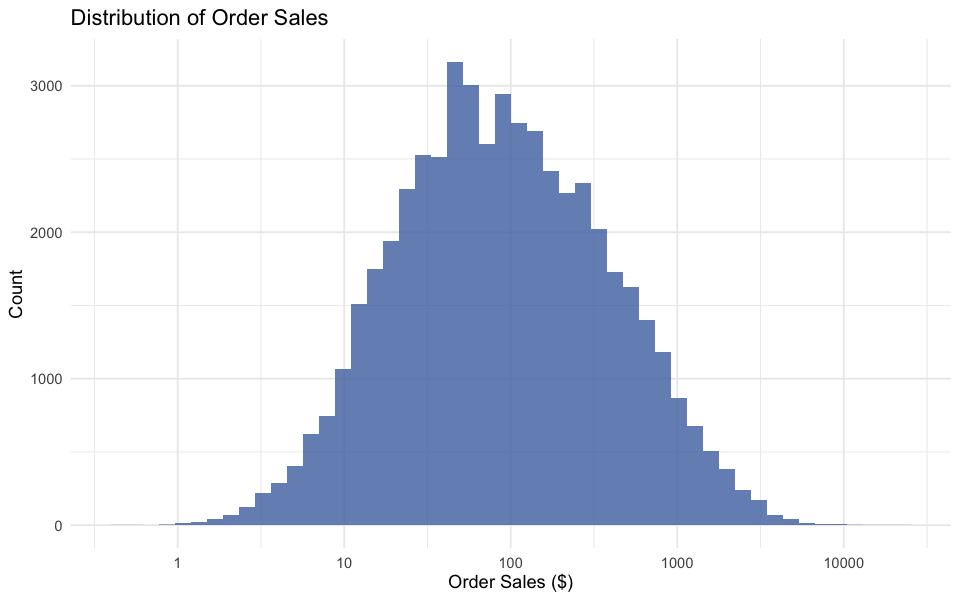

In [31]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(orders, aes(x = sales)) +
    geom_histogram(bins = 50, fill = "#4c72b0", alpha = 0.8) +
    scale_x_continuous(labels = scales::dollar_format()) +
    scale_x_log10() +
    labs(
        title = "Distribution of Order Sales",
        x = "Order Sales ($)",
        y = "Count"
    ) +
    theme_minimal()

### Top X% of orders vs total sales contribution

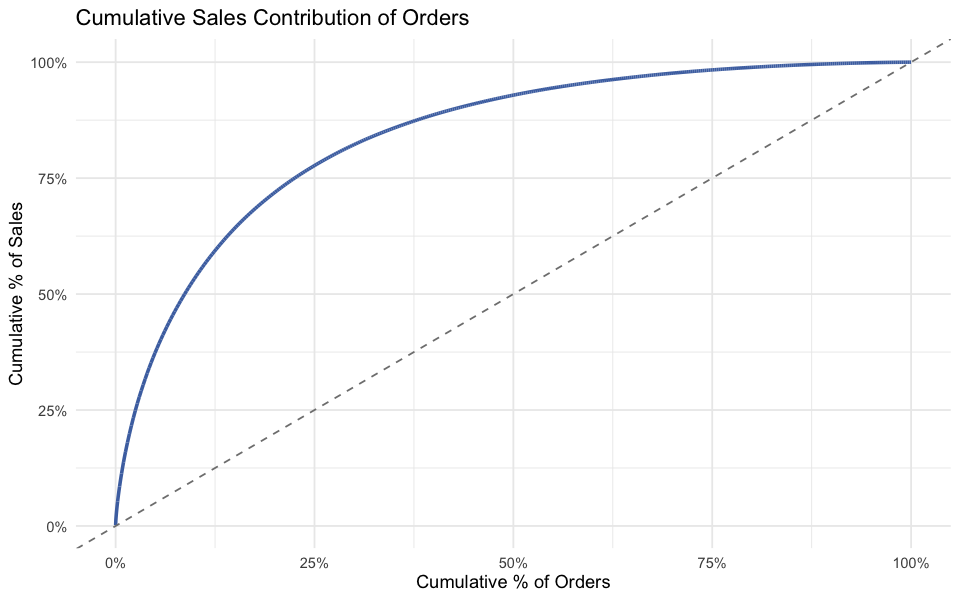

In [32]:
order_concentration <- orders %>% 
    arrange(desc(sales)) %>% 
    mutate(
        order_rank = row_number(),
        cum_orders = order_rank / n(),
        cum_sales  = cumsum(sales) / sum(sales)
    )

ggplot(
    order_concentration,
    aes(x = cum_orders, y = cum_sales)
) +
    geom_line(color = "#4c72b0", linewidth = 1) +
    geom_abline(
        slope = 1, intercept = 0,
        linetype = "dashed", color = "grey50"
    ) +
    scale_x_continuous(labels = scales::percent_format()) +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Cumulative Sales Contribution of Orders",
        x = "Cumulative % of Orders",
        y = "Cumulative % of Sales"
    ) +
    theme_minimal()

### Top X% of products vs total sales contribution

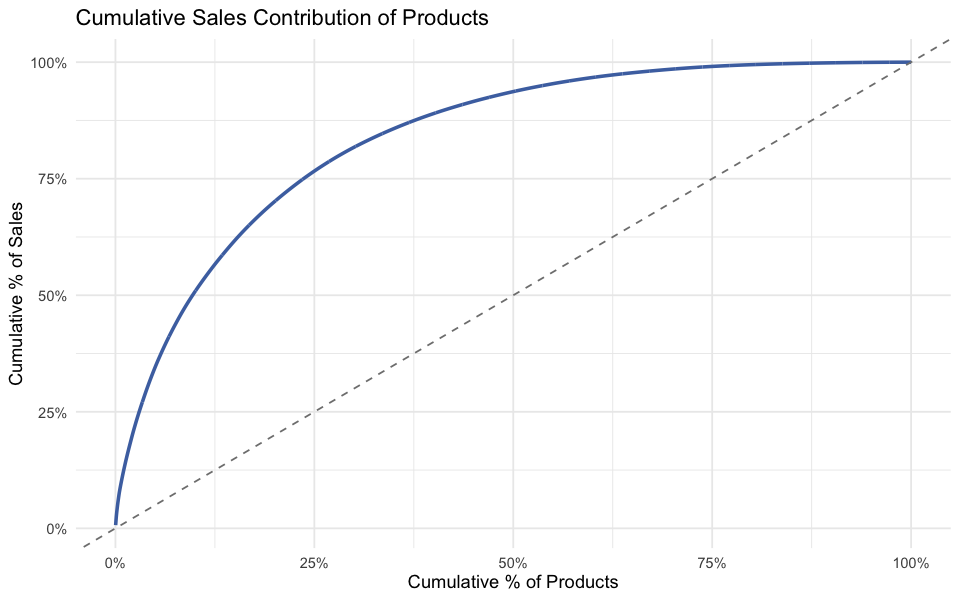

In [33]:
product_sales <- orders %>% 
    group_by(product_name) %>% 
    summarise(
        total_sales = sum(sales),
        .groups = "drop"
    )

product_concentration <- product_sales %>% 
    arrange(desc(total_sales)) %>% 
    mutate(
        product_rank = row_number(),
        cum_products = product_rank / n(),
        cum_sales = cumsum(total_sales) / sum(total_sales)
    )

ggplot(product_concentration, aes(x = cum_products, y = cum_sales)) +
    geom_line(color = "#4C72B0", linewidth = 1) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "grey50") +
    scale_x_continuous(labels = scales::percent_format()) +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Cumulative Sales Contribution of Products",
        x = "Cumulative % of Products",
        y = "Cumulative % of Sales"
    ) +
    theme_minimal()